#코로나로 인한 생활의 변화가 식생활 소비에 미친 영향과 그에 따른 유망산업 분석

안녕하세요 피닉스팀입니다. 저희는 주어진 데이터로 **첫번째**로 *한국의 코로나 현황과 코로나로 인한 생활의 변화*를 분석했습니다. **두번째**로는 *이러한 변화가 소비에 미친 영향과 그에 따른 유망 산업*을 도출해보았습니다.

코로나 바이러스로 인해 세계 경제 및 국내 소비 전반에 큰 영향을 주고있습니다. 저희는 코로나로 인한 국내 소비 생활의 변화가 업종별로 다를 것이라고 예상을 했습니다.
그래서 코로나 발생 현황을 조사하고 그로인한 유동인구와 배달건수, 오프라인 및 온라인 카드 매출의 변화를 분석하여 코로나로 소비 생활이 구체적으로 어떻게 바뀌었는지 파악했습니다.

더 나아가서 이러한 변화가 국내 소비 트렌드와는 어떻게 연결되어 있는지 이 변화로 파생된 유망 품목이나 산업이 있는지를 살펴보고 포스트 코로나 시대에 국내 산업의 발전에 도움이 되는 인사이트를 도출하고자합니다.



### 분석을 위한 기본환경 설정

In [12]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

RUN_MODE = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# 필요한 모듈 추가
import pandas as pd
import numpy as np
from pandas import DataFrame as df

# 시각화|
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib.dates import date2num
from datetime import datetime
import statsmodels.api as sm
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

In [14]:
# 한글처리
import matplotlib.font_manager as fm
import matplotlib as mpl
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=font_path, size=5)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})

# Colab 나눔고딕 설정

plt.rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


# **목차**
---
## **서론: 코로나로 인한 생활 소비변화 탐색**
- 포스트 코로나 시점을 정의한 후 코로나로 인한 소비 생활 변화 탐색  
- 오프라인/온라인 소비 변화 조사

## **본론 : 사람들의 식생활 소비 변화 파악 후 유망산업 발굴**
- 국민카드 데이터로 사람들의 식생활 소비 변화 파악
- 유망 산업 동향과 유망성 조사


## **결론 : 분석 내용 요약 후 유망 산업 트렌드 파악과 서비스 제안**
- 도출한 유망 산업의 트렌드 파악
- SWOT분석
- 서비스 제안
---

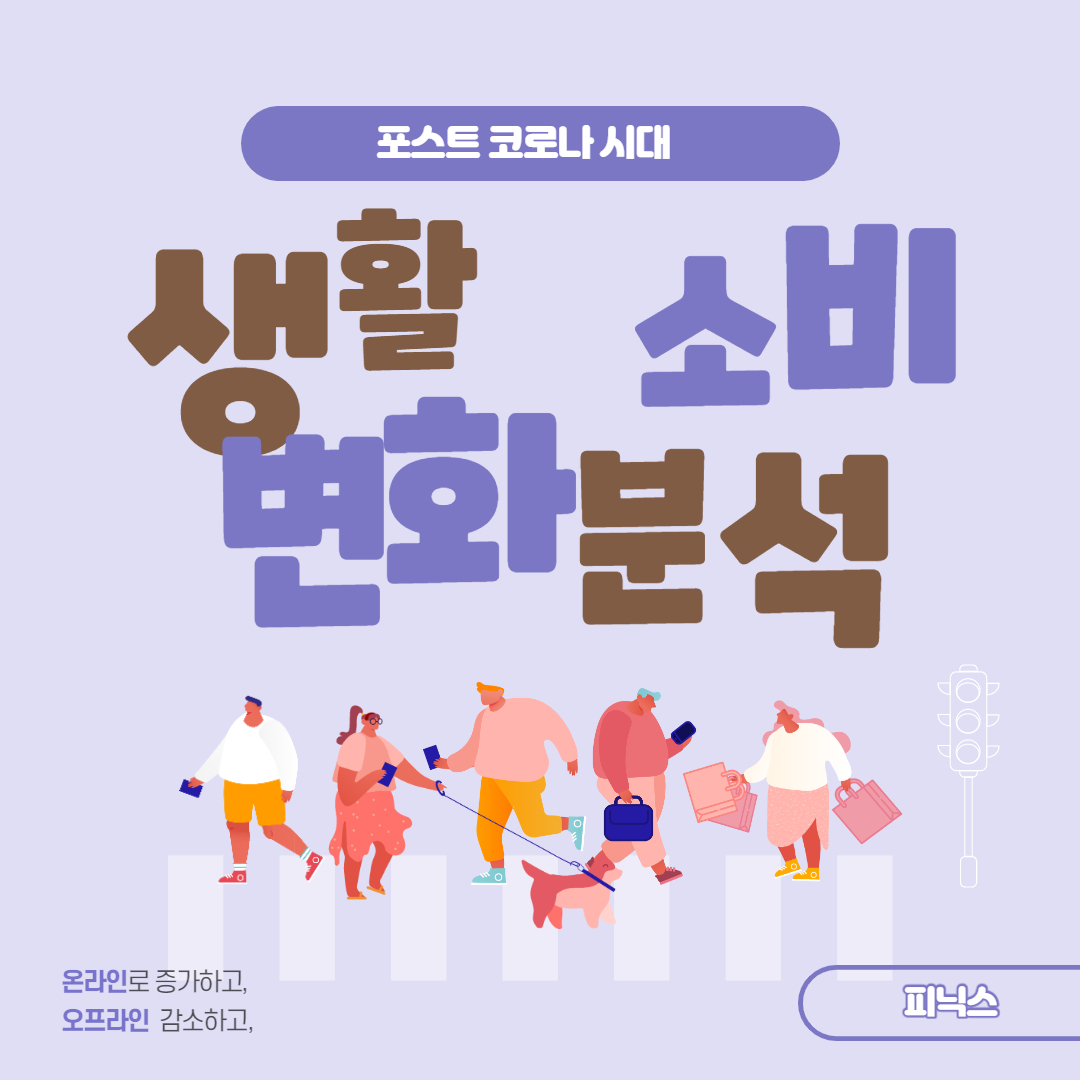

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/phoenix1.jpg')

# 서론


먼저 코로나가 발생한 시기와 그 이후의 확진차 추이를 구체적으로 확인하고 코로나 확산이 사람들의 생활에 어떤 영향을 주었는지 분석해보겠습니다.

코로나로 인한 변화를 분석하기에 앞서 코로나 전후 비교를 위해 포스트 코로나 시대의 기준점을 잡으려고 코로나 확진 현황을 알아보았습니다. 코로나 첫 확진자가 나온 1월 20일부터 6월 14일까지의 데이터를 분석하였습니다.

##코로나
- 첫 확진자가 발생한 1월 20일 월요일부터 6월 14일 일요일까지의 데이터를 분석했습니다.
- 잘못된 데이터가 있어 임의로 수정을 했습니다.
  - http://ncov.mohw.go.kr/tcmBoardView.do?contSeq=354994
  - 6.12. 0시 기준 누적 확진자 1명 감소(서울 1명 최종 음성 판정)
  - 6월 12일 확진자 12,002명으로 수정

### 주별 확진수

In [ ]:
path = '/content/drive/My Drive/Phoenix/Dacon_Data/COVID_19/Time.csv'
covid_week = pd.read_csv(path, encoding='utf-8', usecols=[0, 4])

In [ ]:
# 6월 12일 확진자 12,002명으로 수정
covid_week.loc[144,'confirmed'] = 12002
# 1월 20일 월요일 ~ 6월 14일 일요일 데이터만 사용
covid_week = covid_week.loc[:146]

In [ ]:
# 주별로 합치기 
weeks=[]
cnt=1
for i in range(0,len(covid_week)):
  weeks.append(cnt)
  if (i+1)% 7==0  :
    cnt = cnt+1 
covid_week['weeks']=weeks  
covid_week.set_index('weeks')

,date,confirmed
weeks,,
1,2020-01-20,1
1,2020-01-21,1
1,2020-01-22,1
1,2020-01-23,1
1,2020-01-24,2
...,...,...
21,2020-06-10,11902
21,2020-06-11,11947
21,2020-06-12,12002


In [ ]:
# 그 주의 누적확진자
confirmers = []
for i in range(6,len(covid_week),7):
  cnt=covid_week['confirmed'][i]
  confirmers.append(cnt)
covid_weekly = df(data=confirmers)
covid_weekly.columns = ['confirmers']

In [ ]:
weeks = list()
for i in range(1,22):
  weeks.append(i)
covid_weekly['weeks'] = weeks
covid_weekly.set_index('weeks')

,confirmers
weeks,
1,3
2,15
3,27
4,29
5,602
6,3736
7,7134
8,8126
9,8897


In [ ]:
# 전주 대비 증가율 
# 오늘 확진자 covid_weekly['confirmers'][i]
# 어제 확진자 covid_weekly['confirmers'][i-1]
growth_rate = []
for i in range(0, len(covid_weekly)):
  if i == 0:
    growth_rate.append(0)
  else:  
    rate = round(( covid_weekly['confirmers'][i]  - covid_weekly['confirmers'][i-1] ) / covid_weekly['confirmers'][i-1] * 100, 2)
    growth_rate.append(rate)
covid_weekly["growth_rate"] = growth_rate

In [ ]:
coivd_rate = covid_weekly.loc[ : , ['weeks','growth_rate'] ]
coivd_rate.set_index('weeks')

,growth_rate
weeks,
1,0.00
2,400.00
3,80.00
4,7.41
5,1975.86
6,520.60
7,90.95
8,13.91
9,9.49


### 코로나 주별 확진자 증가율

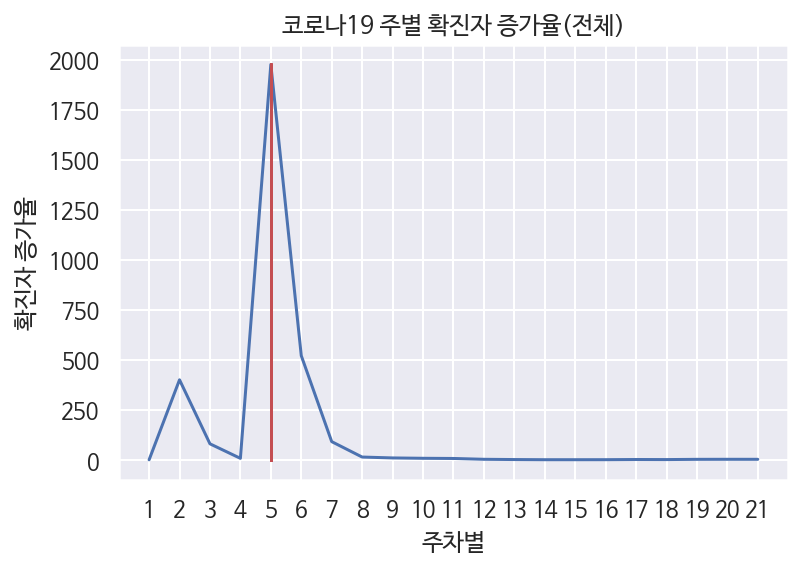

In [ ]:
plt.figure()
plt.plot(coivd_rate['weeks'],coivd_rate['growth_rate'])
plt.grid('white')
plt.xlabel('주차별')
plt.ylabel('확진자 증가율')
plt.title('코로나19 주별 확진자 증가율(전체)')
plt.xticks(coivd_rate['weeks'])
plt.plot([5]*21, coivd_rate['growth_rate'], 'r')
plt.show()

2020년 1월 20일 월요일 첫 확진자가 발생했고 이 주를 1주차로 정했습니다. 
위 그래프느로 주별 확진자 합계를 나타내었습니다. 20배 이상 확진자가 급증한 **2월 19일**이 포함된 **5주차**를 코로나 전후 기준점으로 잡기로 결정했습니다. 


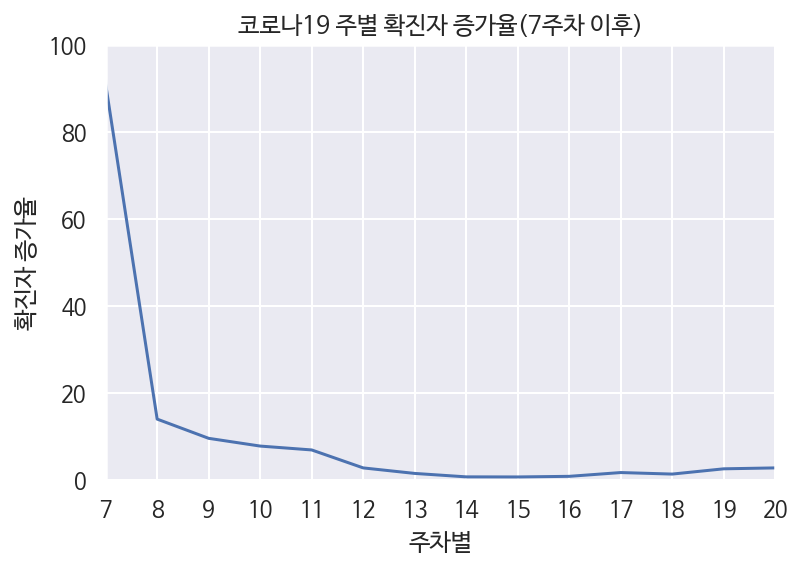

In [ ]:
plt.figure()
plt.plot(coivd_rate['weeks'],coivd_rate['growth_rate'] )
plt.grid('white')
plt.xlabel('주차별')
plt.ylabel('확진자 증가율')
plt.title('코로나19 주별 확진자 증가율(7주차 이후)')
plt.xticks(coivd_rate['weeks'])
plt.xlim(7,20)
plt.ylim(0,100)
plt.show()

- 위 그래프에서는 6주차 이후의 확진자 증가율이 잘 보이지않아 그 이후만 따로 보기위해 차트를 만들었습니다.
- 점점 줄어들었다 다시 조금씩 늘어나는 것을 확인할 수 있었습니다.
- 7주차 이후에도 꾸준히 코로나 확진자는 계속 발생하고 있습니다. 5주차에서처럼 급작스런 증가는 없지만 코로나가 장기화되고 생활화가 되었다는 것을 짐작해볼 수 있는 상황입니다.

### 코로나 월별 확진자

In [ ]:
my_dict = {"month": ["2020-01","2020-02", "2020-03","2020-04","2020-05"],"confirmed" : [11,3139,6635,979,703]}
covid_monthly = pd.DataFrame(my_dict)
covid_monthly.set_index('month',inplace=True)

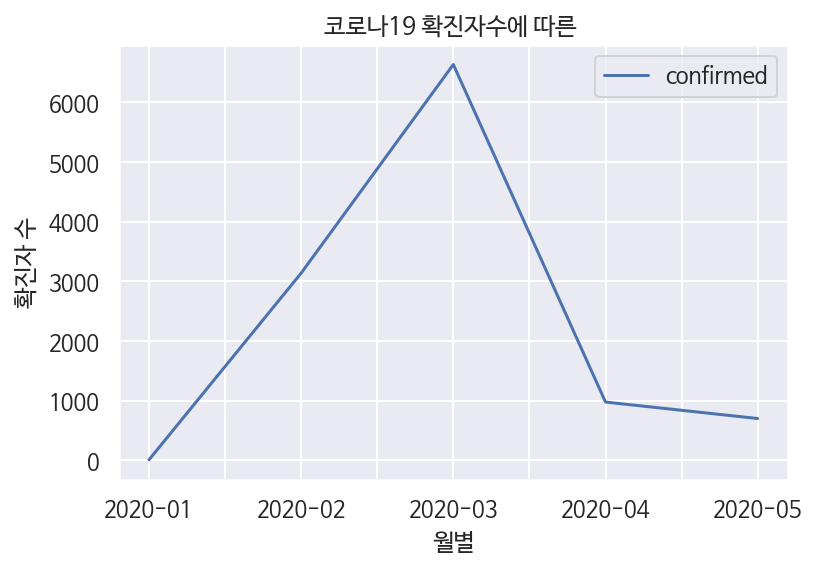

In [ ]:
covid_monthly.plot()
plt.title('코로나19 확진자수에 따른 ')
plt.xlabel('월별')
plt.ylabel('확진자 수')
plt.show()

월별 확진자 수를 합산하여 그래프로 나타내었습니다. 가장 많은 확진자가 나온 것은 2월 18일이었지만 월별 합계는 3월이 더 높았습니다.

## 유동인구의 변화와 배달건수와의 상관관계

  코로나의 기준점을 잡았으니 이제부터는 코로나로 인한 생활의 변화를 알아보도록 하겠습니다.

  전세계로 전염성 강한 코로나가 확산되면서 일어난 가장 큰 변화는 락다운 등의 이동 제한이었습니다. 우리 나라에서는 강제적인 제재는 없었지만 사회적 거리두기가 권장되었습니다. 이를 유동인구와 배달데이터를 분석하면서 확인해볼 수 있었습니다.
- 데이터 확인 결과 배달데이터와 유동인구가 공통적으로 포함하고 있는 서울시의 11개구만 추출하여 분석하였습니다.
- 11개 지역구: 관악구, 구로구, 금천구, 노원구, 도봉구, 동작구, 서대문구, 서초구, 양천구, 영등포구, 은평구


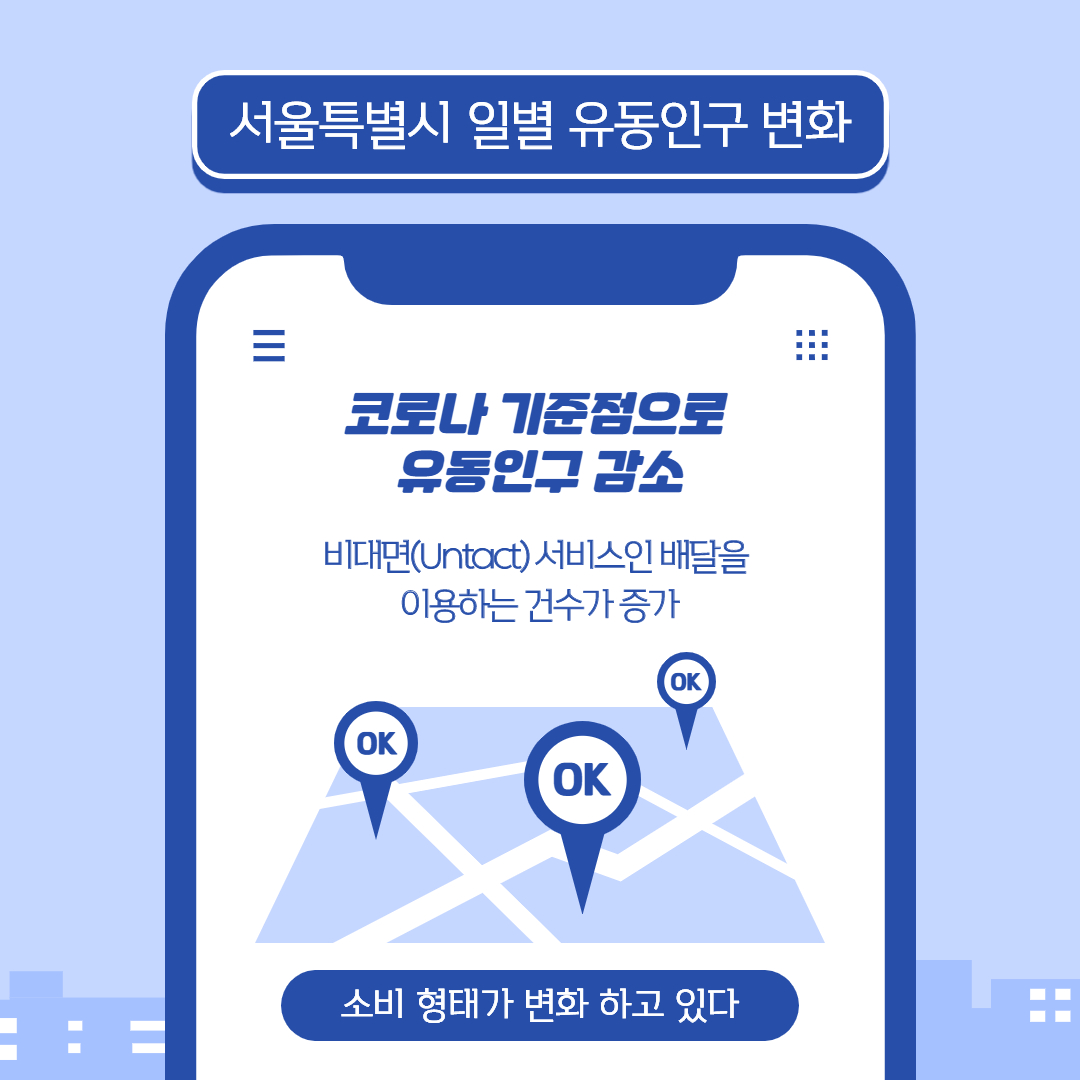

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/phoenix3.jpg')

### 배달데이터 분석

In [ ]:
# 데이터 불러오기
path = "/content/drive/My Drive/Phoenix/Dacon_Data/delivery.csv"
delivery = pd.read_csv(path)

In [ ]:
# 서울데이터만 추출 후 배달건수 구하기
delivery=delivery[delivery['DLVR_STORE_SIDO']=='서울특별시'].loc[:,['PROCESS_DT', 'DLVR_STORE_SIGUNGU','DLVR_AMOUNT']]
delivery=pd.pivot_table(data=delivery, index=['PROCESS_DT'],
                       columns=['DLVR_STORE_SIGUNGU'], aggfunc='count')
delivery.fillna(0) # 결측치는 0건으로 처리

DLVR_AMOUNT                  ...                     
DLVR_STORE_SIGUNGU         관악구     구로구     금천구  ...    양천구   영등포구    은평구
PROCESS_DT                                      ...                     
2020-01-01               268.0  2125.0   890.0  ...   91.0  720.0  399.0
2020-01-02                91.0  1378.0   550.0  ...   46.0  626.0  263.0
2020-01-03               153.0  1684.0   671.0  ...   67.0  758.0  307.0
2020-01-04               202.0  2049.0   867.0  ...   67.0  831.0  387.0
2020-01-05               249.0  2076.0   901.0  ...   71.0  840.0  408.0
...                        ...     ...     ...  ...    ...    ...    ...
2020-06-10               146.0  1818.0   834.0  ...   79.0  746.0  368.0
2020-06-11               133.0  1564.0   766.0  ...   74.0  727.0  303.0
2020-06-12               173.0  1867.0   838.0  ...  110.0  817.0  359.0
2020-06-20               310.0  1966.0   950.0  ...  161.0  845.0  452.0
2020-06-21               372.0  2134.0  1101.0  ...  162.0  871.0  440.0

[165 rows x 11 columns]

In [ ]:
# 컬럼명 변경
delivery.columns = [i for _, i in delivery.columns]

In [ ]:
# 배달건수 일별 합계 구하기
sum_delivery = pd.DataFrame(index=delivery.index, columns=['delivery_sum'])
for idx in list(delivery.index):
  sum_delivery.loc[idx] = np.sum(delivery.loc[idx])

<Figure size 432x288 with 0 Axes>

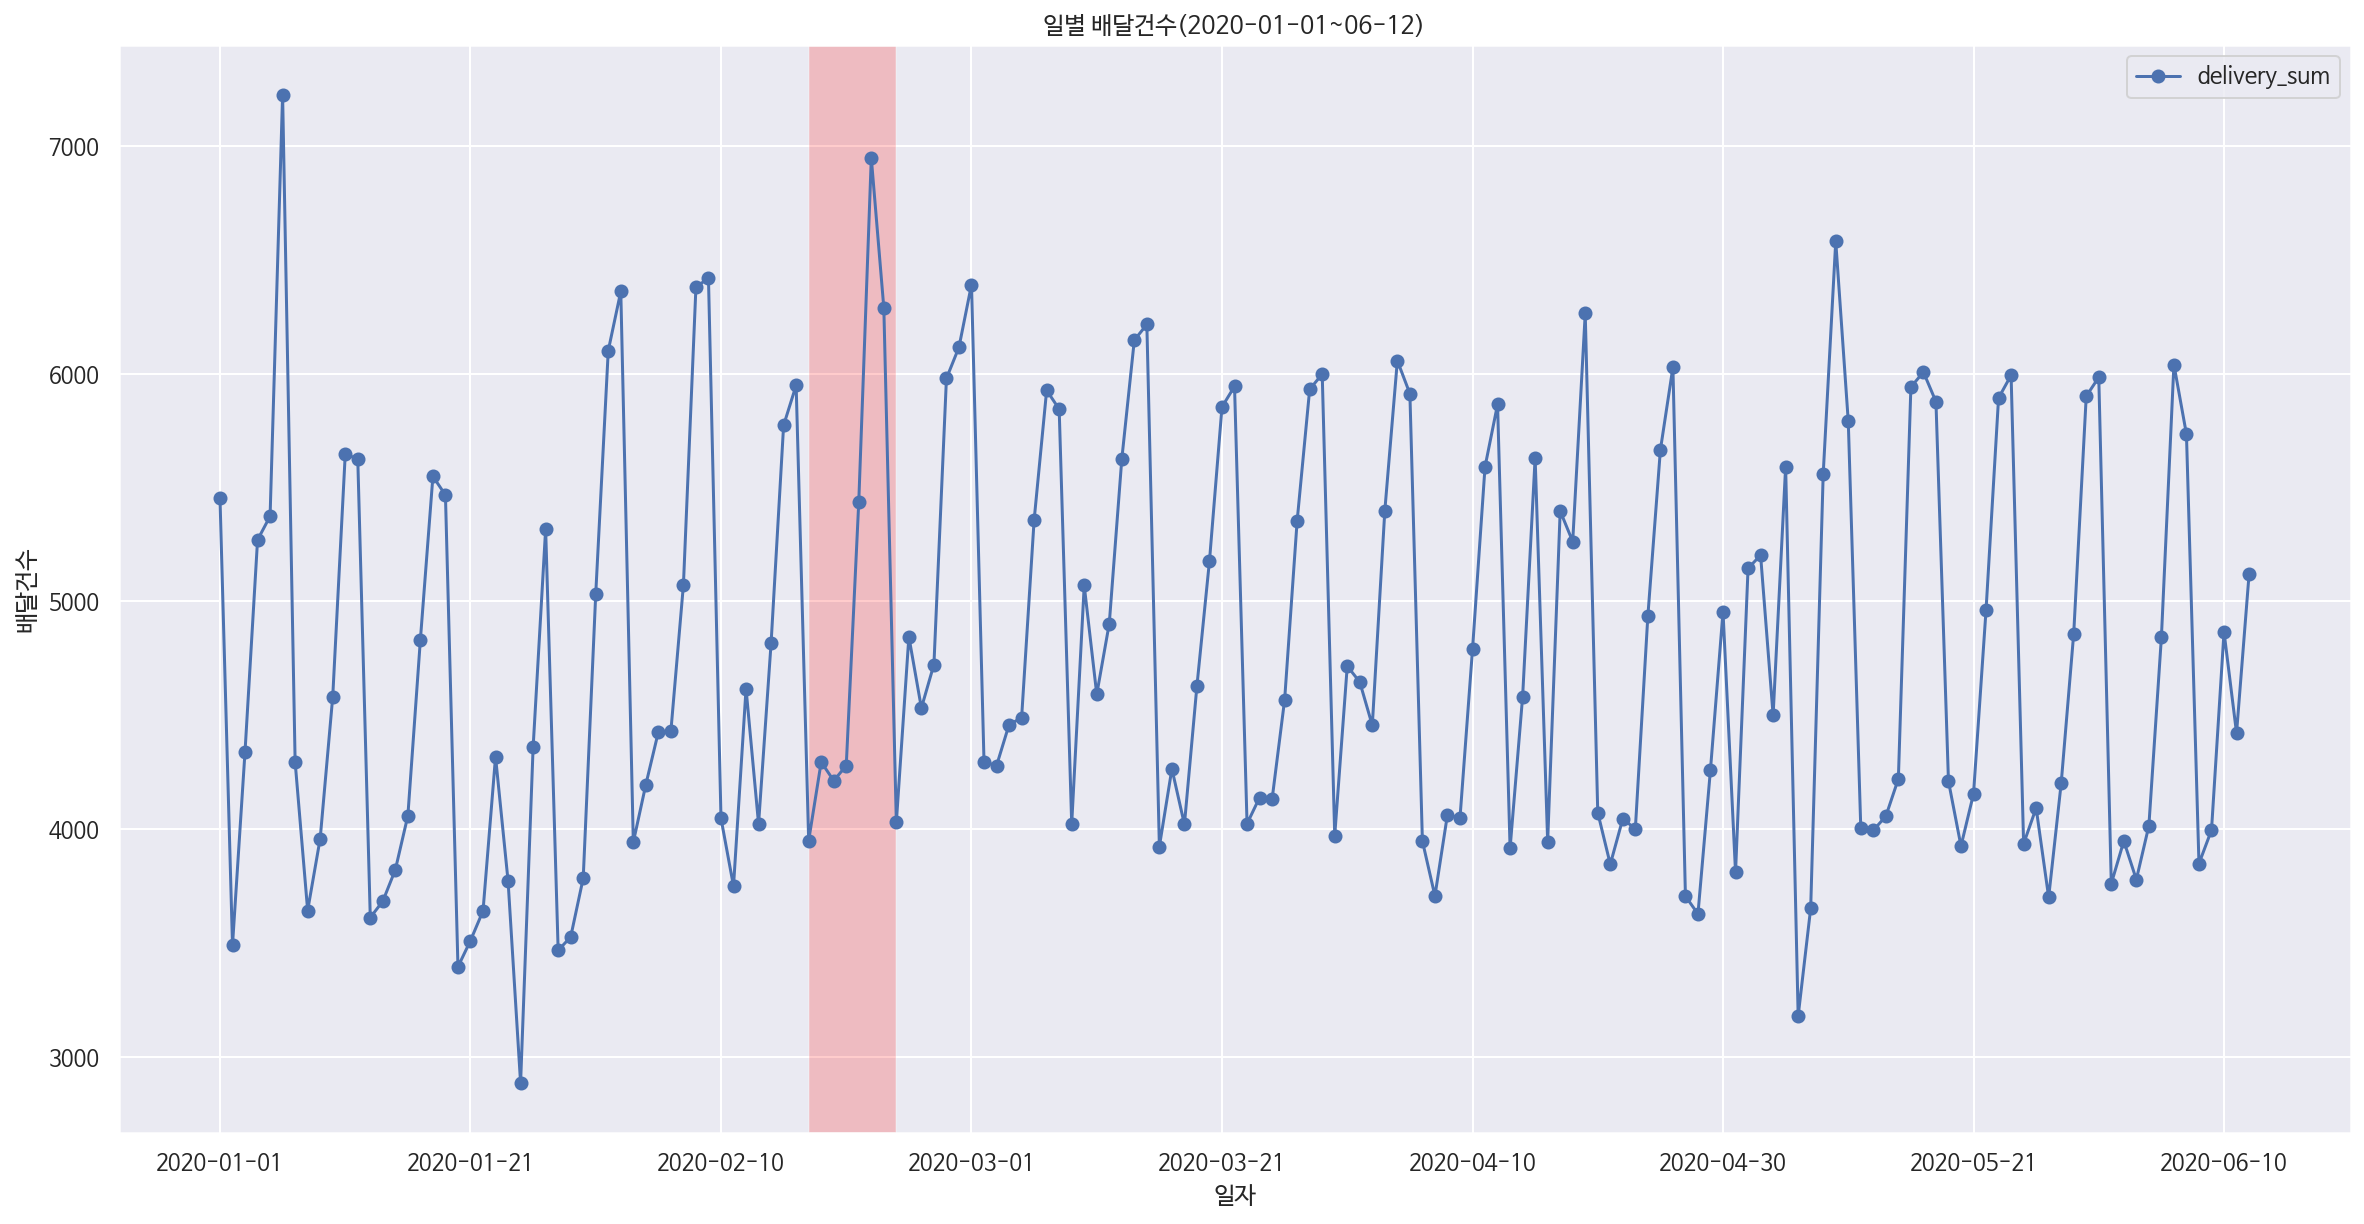

In [ ]:
# 합계 시각화(01-01~06-12)
plt.figure()
sum_delivery[:-2].plot(figsize=(20,10),marker='o')
plt.xlabel('일자')
plt.ylabel('배달건수')
plt.title('일별 배달건수(2020-01-01~06-12)')
plt.axvspan(47, 54, 0, 6000, facecolor='red', alpha=0.2)
plt.show()


 delivery.csv에서 11개 서울 지역구의 일별  배달건수를 구한 후 합계를 계산하여 그래프로 나타내었습니다. 
- 빨간색으로 표시된 부분이 앞서 구한 기준점인 5주차입니다.
- 5월 18일 데이터가 빠져있어 5월의 데이터는 부정확할 수 있습니다.

사람들이 배달을 시키는 행동에 특정한 패턴을 발견했습니다. 7일 주기로 평일에는 건수가 감소했다가 주말에 가까워질수록 증가하는 패턴입니다. 코로나 확산 구간 이후로 패턴에 변화는 없지만 평일과 주말의 배달건수 차이가 줄어들었고 배달건수가 전체적으로 약간 증가했다는 것을 확인할 수 있습니다.


### 유동인구 분석

In [ ]:
# 데이터 가져오기
path1 = '/content/drive/My Drive/Phoenix/Dacon_Data/fpopl.csv'
fpop = pd.read_csv(path1, encoding='utf-8')
# 행정정보 데이터 
path2 = '/content/drive/My Drive/Phoenix/Dacon_Data/adstrd_master.csv'
adstrd_info = pd.read_csv(path2, encoding='utf-8')

In [ ]:
# 행정정보 코드 int형으로 바꾸기
adstrd_info['adstrd_code']=adstrd_info['adstrd_code'].apply(lambda x:int(x))
# 행정코드 기준으로 합치기
fpop = pd.merge(fpop, adstrd_info, on='adstrd_code', how='left')

In [ ]:
# 배달 데이터와의 비교를 위해 11개의 구로 추리기
cols = ['관악구', '구로구', '금천구', '노원구', '도봉구', '동작구', '서대문구', '서초구', '양천구', '영등포구', '은평구']
fpop_seoul_11 = fpop[fpop['signgu_nm'].isin(cols)]
# 날짜데이터 string형으로 변경하고 일별 유동인구 합계 구하기
fpop_seoul_11['base_ymd'] = fpop_seoul_11['base_ymd'].apply(lambda x:f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}')
fpop_seoul_11 = pd.pivot_table(fpop_seoul_11, index =['base_ymd'],columns=['signgu_nm'],values=['popltn_cascnt'], aggfunc=[np.sum])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 컬럼명 변경
fpop_seoul_11.columns = [i for _,_,i in fpop_seoul_11.columns]

In [ ]:
# 11개의 구의 합계 데이터
sum_fpop = pd.DataFrame(index=fpop_seoul_11.index, columns=['sum'])
for idx in list(fpop_seoul_11.index):
    sum_fpop.loc[idx]=np.sum(fpop_seoul_11.loc[idx])

<Figure size 432x288 with 0 Axes>

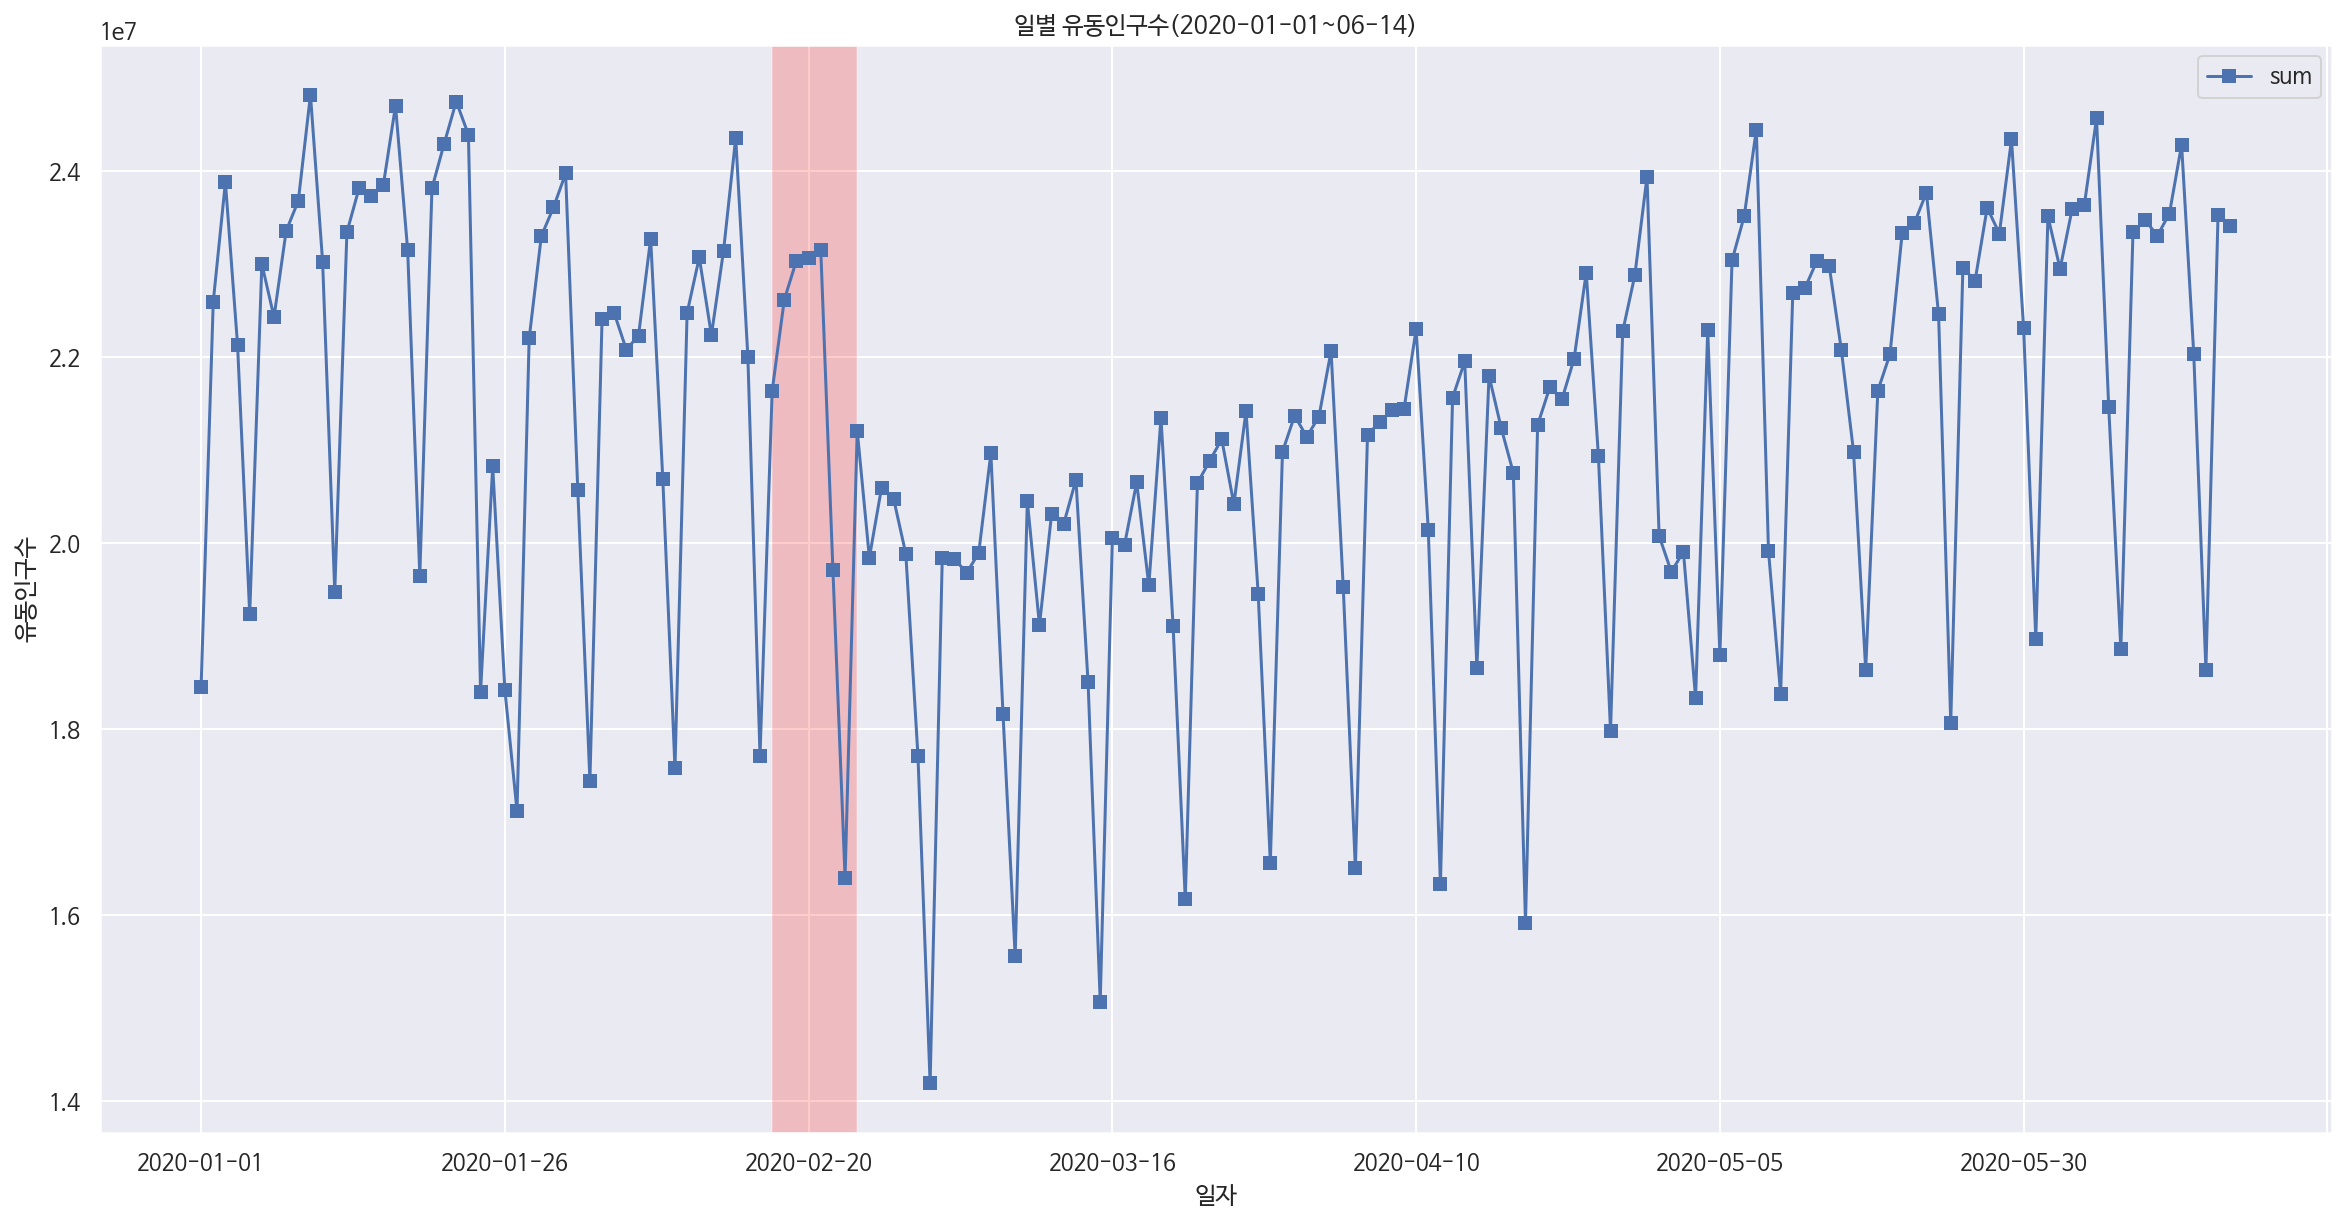

In [ ]:
# 합계 시각화
plt.figure()
sum_fpop.plot(figsize=(20,10), marker='s')
plt.xlabel('일자')
plt.ylabel('유동인구수')
plt.title('일별 유동인구수(2020-01-01~06-14)')
plt.axvspan(47, 54, 0, 6000, facecolor='red', alpha=0.2)
plt.show()



11개 구의 일별 유동인구 합계를 구하였습니다. 코로나 확진자가 증가한 후 유동인구가 급감한 것을 확연하게 볼 수 있습니다. 코로나의 확산이 소강상태로 접어들면서 사회적 거리두기에서 생활속 거리 두기(5월 6일)로 전환하면서 유동인구수도 회복하는 양상을 보입니다.


### 유동인구와 배달건수 상관관계 분석

In [ ]:
# 유동인구 합계와 배달건수 합계 데이터 합치기 위한 전처리
dic1 = {
    'base_ymd' : sum_delivery.index,
    'delivery_sum' : sum_delivery['delivery_sum']
}
sum_delivery = pd.DataFrame(dic1)
sum_delivery.reset_index(inplace=True, drop=True)
dic2 = {
    'base_ymd' : sum_fpop.index,
    'fpop_sum' : sum_fpop['sum']
}
sum_fpop = pd.DataFrame(dic2)
sum_fpop.reset_index(inplace=True, drop=True)

# 데이터 합치기
delivery_fpop=pd.merge(sum_delivery[:-2], sum_fpop, how='left', on='base_ymd')

In [ ]:
# 주별 유동인구와 배달건수 변화 구하기
weekly_sum = pd.DataFrame(columns=['delivery_sum','fpop_sum'])
a = 1
for i in range(19,138,7):  
  weekly_sum.loc[f'{a}주차']=(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
  a += 1

# 20주차의 5월 18일 데이터가 빠져있어서 빼고 계산
weekly_sum.loc['18주차']=(np.sum(delivery_fpop.iloc[:,1:][138:144]))

b = 19
for i in range(144,155,7):  
  weekly_sum.loc[f'{b}주차']=(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
  b += 1

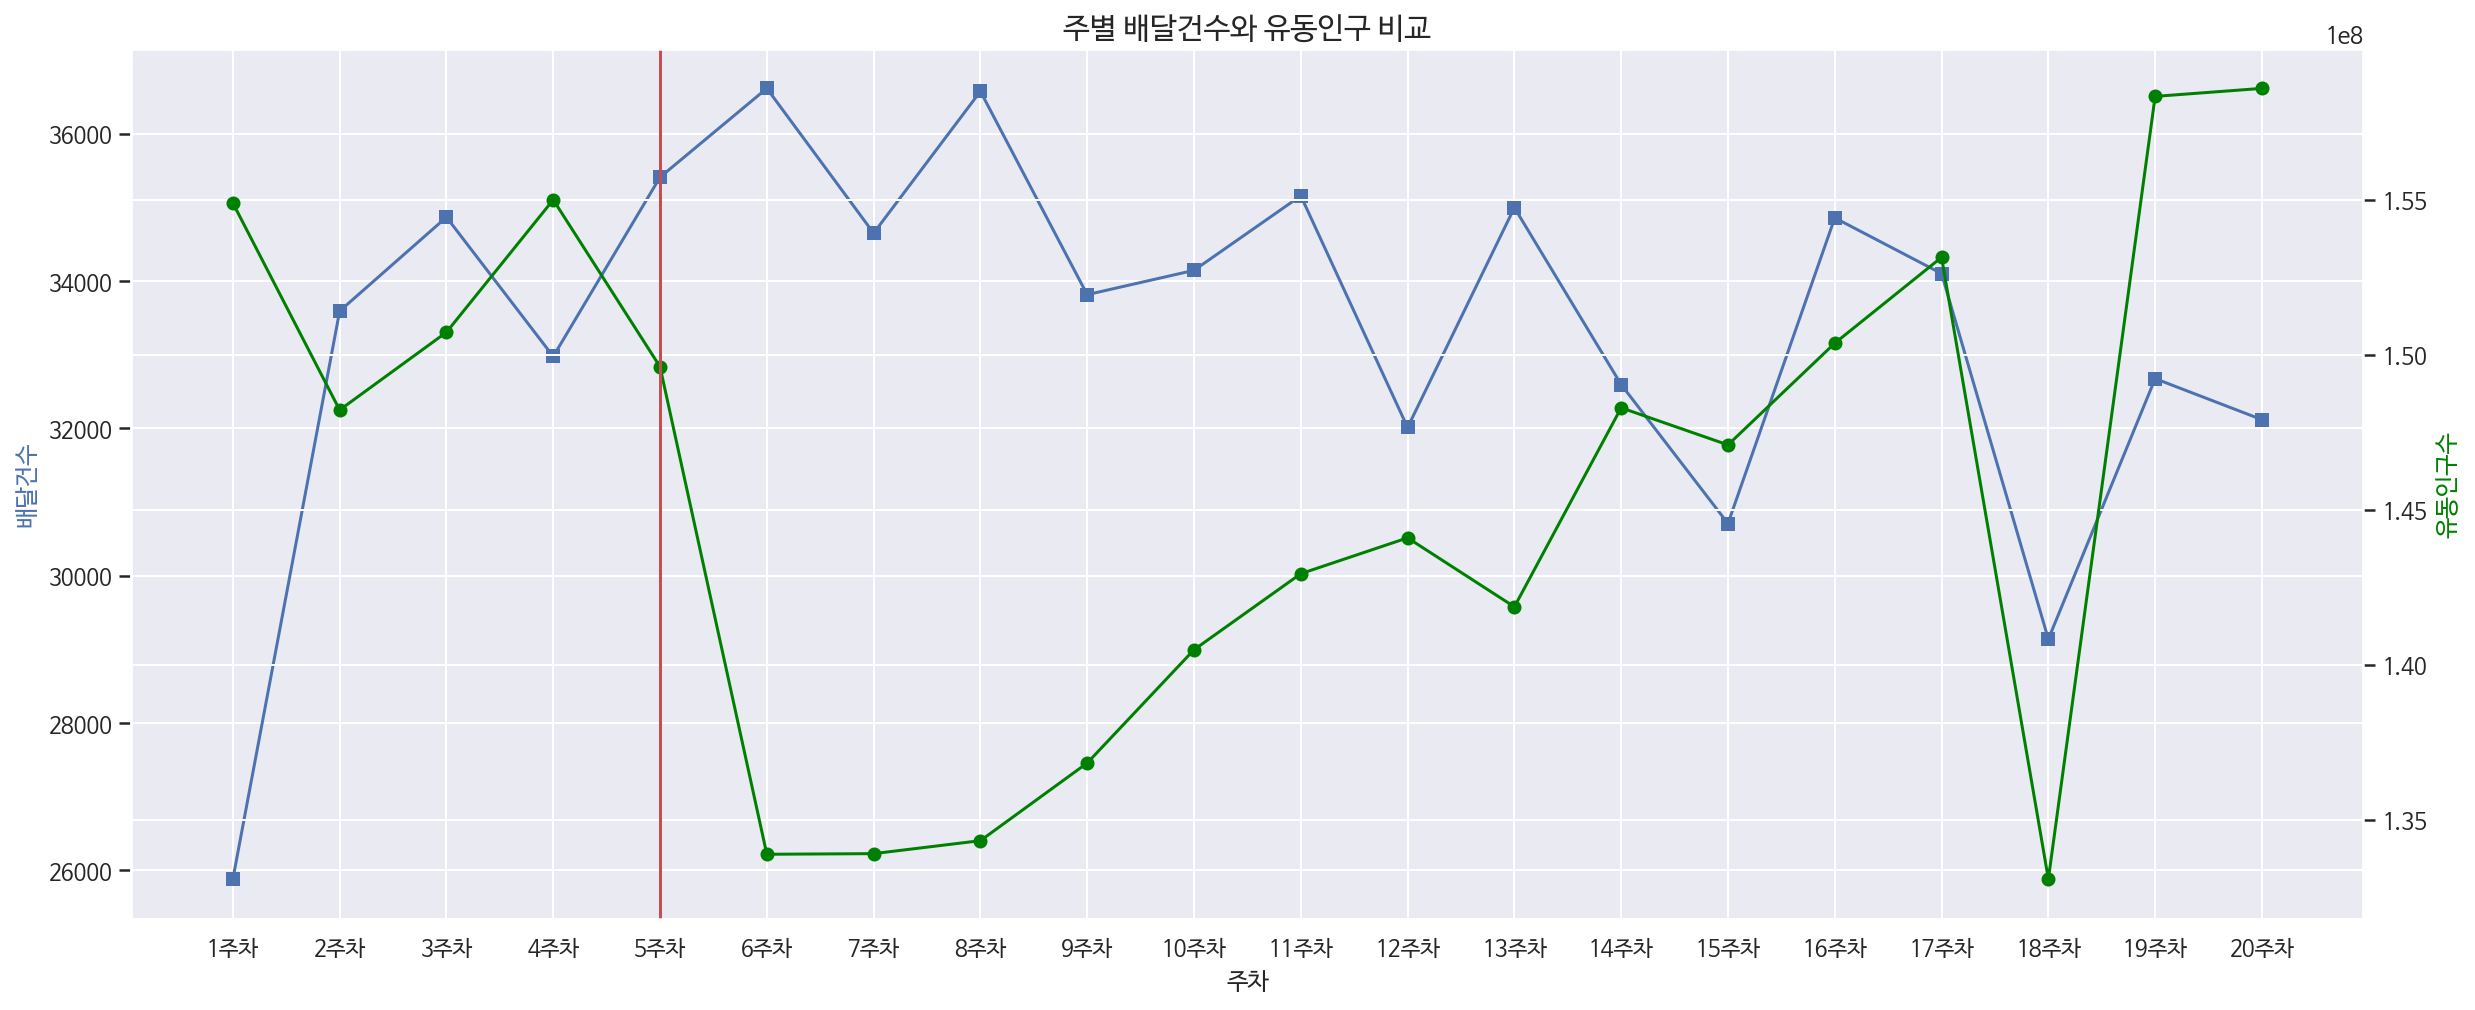

In [ ]:
# 시각화
#18주차에 5월 18일 데이터가 빠져있음
fg, ax1 = plt.subplots()
fg.set_size_inches(20,8)
ax2 = ax1.twinx()
ax1.plot(weekly_sum.index, weekly_sum['delivery_sum'], marker='s')
ax2.plot(weekly_sum.index, weekly_sum['fpop_sum'], marker='o', color="green" )
ax1.set_xlabel('주차')
ax1.set_ylabel('배달건수', color='b')
ax2.set_ylabel('유동인구수', color='green')
plt.axvline(x='5주차', color = 'r')
plt.title('주별 배달건수와 유동인구 비교', size = 15)
plt.show()

이번에는 주별 배달건수와 유동인구수의 합계를 구하여 그래프에 같이 표현하였습니다. 
- 2월 19일(5주차)을 기점으로 하여, 유동인구가 감소하면서 비대면(Untact) 서비스인 배달을 이용하는 건수가 증가했습니다.
- 최근 코로나19에 따른 비대면 경제 확산으로 배달(App)과 같은 모바일 시장이 발달하고 있는 추세입니다.
- 코로나가 발생한 후 두 선이 반대로 움직이는 현상을 확인했습니다. 사람들이 실제로 실내에 머물렀다는 변화를 시각적으로 알 수 있었습니다.



In [ ]:
# 유동인구와 배달건수 상관관계를 나타내기 위해 데이터 전처리
delivery_fpop['delivery_sum']=delivery_fpop['delivery_sum'].apply(lambda x:float(x))
delivery_fpop['fpop_sum']=delivery_fpop['fpop_sum'].apply(lambda x:float(x))

<Figure size 432x288 with 0 Axes>

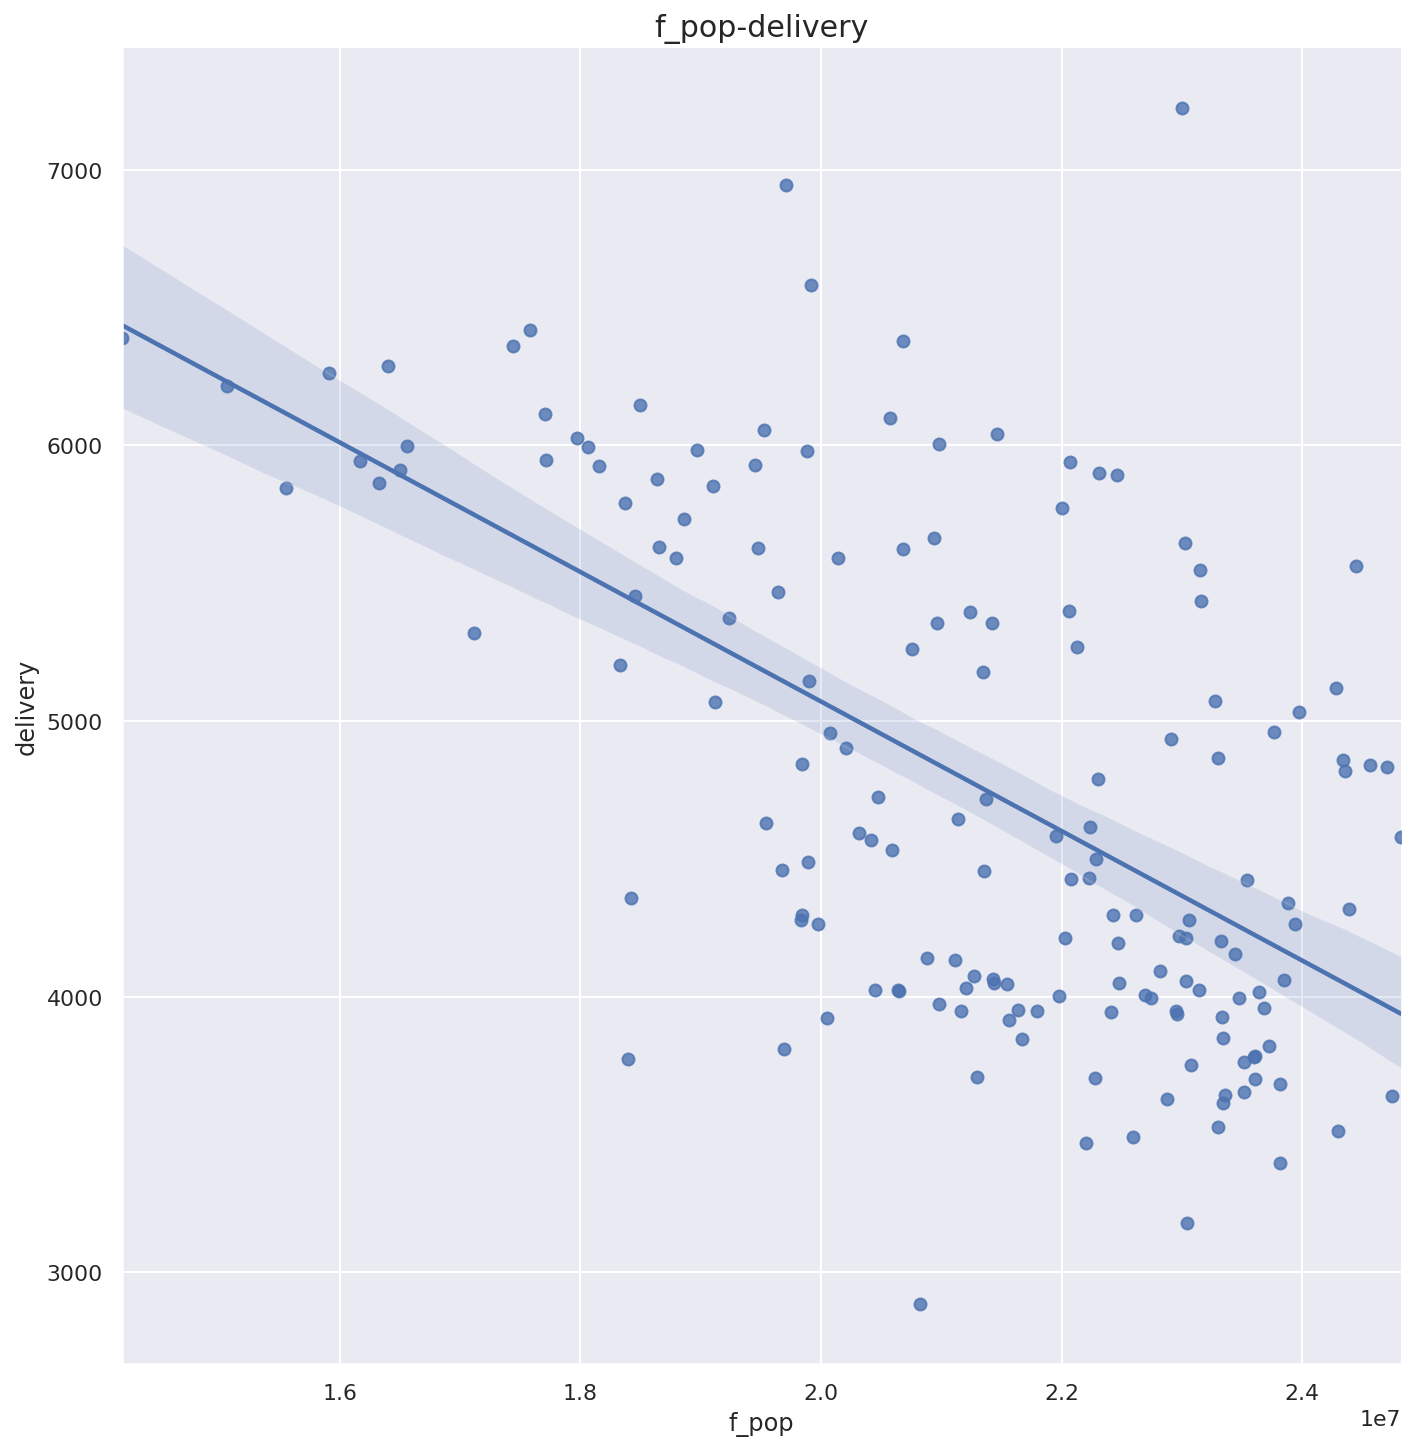

In [ ]:
# 유동인구와 배달건수 상관관계 시각화
plt.figure()
sns.set_style('darkgrid')
sns.lmplot(x='fpop_sum', y='delivery_sum', data=delivery_fpop, height=10)
plt.xlabel('f_pop')
plt.ylabel('delivery')
plt.title('f_pop-delivery', size=15)
plt.show()

In [ ]:
# 유동인구와 배달건수 상관관계 확인
model = sm.OLS( weekly_sum['delivery_sum'], sm.add_constant(weekly_sum['fpop_sum']))
result = model.fit()
print( result.summary())

                            OLS Regression Results                            
Dep. Variable:           delivery_sum   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.996
Date:                Fri, 31 Jul 2020   Prob (F-statistic):              0.175
Time:                        08:52:25   Log-Likelihood:                -183.73
No. Observations:                  20   AIC:                             371.5
Df Residuals:                      18   BIC:                             373.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.742e+04   9981.258      4.751      0.0

유동인구수에 따른 배달건수 변화를 나타낸 그래프입니다.
이를 통해 유동인구수가 증가할수록 배달 건수가 감소했다는 사실을 확인할 수 있었습니다.

- R² : 0.1 → 상관관계가 존재할 것이라고 예상했으나, 사실은 코로나19 상황으로 인한 변화이고 유동인구와 배달건수 사이에는 상관관계가 없음을 확인

포스트 코로나 시대 사회적 거리두기와 비대면(Untact) 서비스 트랜드의 영향으로 사람들의 소비 행태가 변화하고 있습니다.

그렇다면 이러한 행동의 변화가 소비 생활에는 어떤 영향을 미쳤는지 오프라인과 온라인으로 나눠 분석해보겠습니다.

## 오프라인 소비 확인

먼저 오프라인 소비 생활의 변화에 대해 알아보겠습니다.
코로나 기준점인 2월 19일(5주차)를 전후로 하여 매출액과 건수를 통해 어떠한 업종에 오프라인 소비 생활의 변화가 있었는지 확인해보겠습니다.



### 월간 국내카드 승인 실적
- 출처 : http://kosis.kr/statHtml/statHtml.do?orgId=435&tblId=DT_435001N_001&conn_path=I2
- 제공 : (사)한국여신전문금융업협회,「월간국내카드승인실적」
- 데이터 정보
  - 전국 신용카드 가맹점에서 발생한 국내 카드승인금액


In [ ]:
path = '/content/drive/My Drive/Phoenix/Extra_Data/monthly_card.csv'
monthly_card = pd.read_csv(path, encoding='CP949')

In [ ]:
monthly_card = monthly_card.T
monthly_card.columns = monthly_card.loc['한국표준산업분류별']
monthly_card = monthly_card.drop(['한국표준산업분류별'])

In [ ]:
cols = monthly_card.columns
for col in cols:
  monthly_card[col] = monthly_card[col].apply(lambda x:int(x))
monthly_card.dtypes

한국표준산업분류별
도매 및 소매업                    int64
운수업                         int64
숙박 및 음식점업                   int64
사업시설관리 및 사업지원 서비스업          int64
교육서비스업                      int64
보건업 및 사회복지 서비스업             int64
예술, 스포츠 및 여가관련 서비스업         int64
협회 및 단체, 수리 및 기타 개인 서비스업    int64
dtype: object

In [ ]:
# 월별 카드 승인 총합
monthly_card_total = monthly_card
monthly_card_total["합계"] = round(np.sum(monthly_card,axis=1))
# 월별 카드 승인 평균
monthly_card_total["평균"] = round(np.mean(monthly_card,axis=1))
monthly_card_total["평균"] = monthly_card_total["평균"].astype('int') 


In [ ]:
# 인덱스명 변경
index_li=list()
for i in range(len(monthly_card.index)):
  index_li.append(f'{monthly_card.index[i][0:4]}-{monthly_card.index[i][6:8]}')
monthly_card.index = index_li

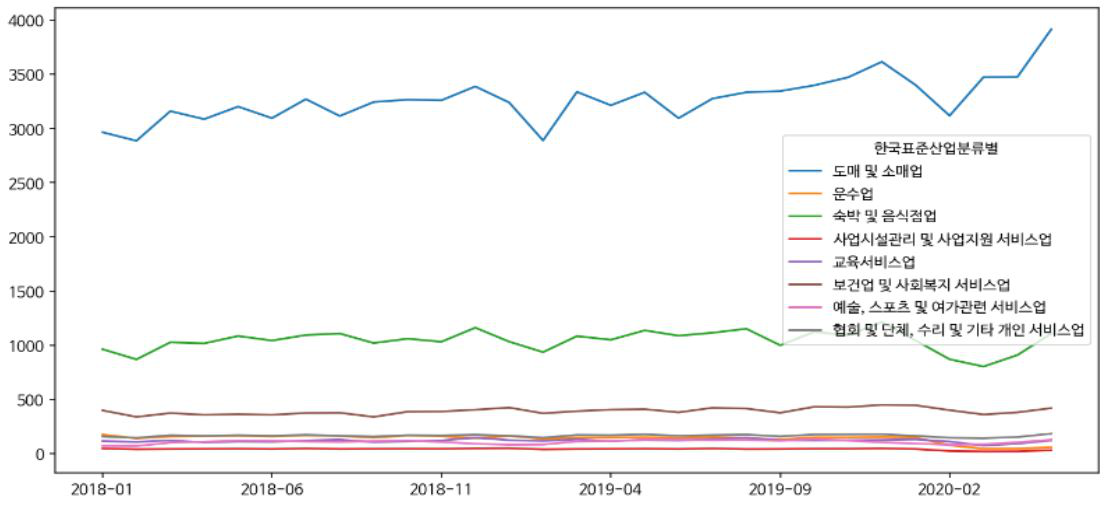

In [ ]:
#업종별 카드 승인
#monthly_card.iloc[:,:-2].plot(figsize=(12,6))
# 한글이 깨져서 이미지로 첨부
Image.open('/content/drive/My Drive/Phoenix/image/1.jpg')

도매 및 소매업에서 가장 많은 결제 금액이 발생하였습니다.
- 코로나19 상황으로 잠깐 주춤하지만 다시 상승하는 양상을 보입니다.
- 전체 업종별 증감율은 전년대비 코로나19의 영향을 크게 받았지만 도매 및 소매업은 꾸준히 증가하고 있음을 확인할 수 있었습니다.

In [ ]:
x = list(monthly_card.index[4:17]) #2018년 5월부터 2019년 5월까지
y = list(monthly_card.index[16:]) #2019년 5월부터 2020년 5월까지

In [ ]:
# 증감률 계산
growth_rate = pd.DataFrame(columns=monthly_card.columns)
for idx in range(0,len(x)):
  tmp = (monthly_card.loc[ y[idx] ] - monthly_card.loc[ x[idx] ]) / monthly_card.loc[ x[idx] ] * 100 
  growth_rate.loc[f'{y[idx]}증감률'] = tmp

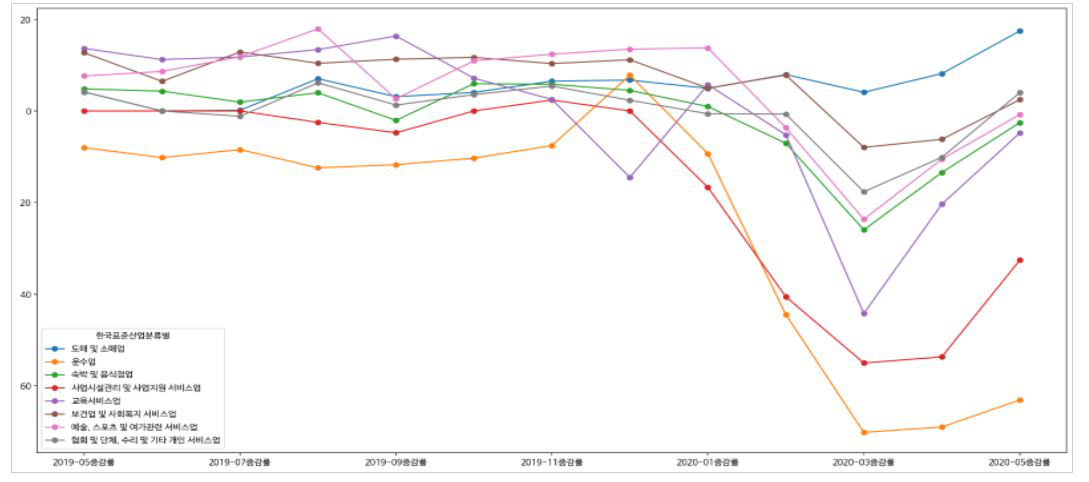

In [ ]:
# 상품군별 증감율
#growth_rate.iloc[:,:-2].plot(figsize=(20,10), marker='o')
# 한글이 깨져서 이미지로 첨부
Image.open('/content/drive/My Drive/Phoenix/image/2.jpg')

도매 및 소매업의 꾸준한 증가률을 확인했습니다.
그래서 저희는 오프라인 소비 변화가 적었던 도매 및 소매업에 주목하고자합니다.

### 오프라인 카드 데이터 준비


In [15]:
# 데이터 준비(서울시 카드 데이터)
path = '/content/drive/My Drive/Phoenix/Dacon_Data/card_20200717.csv'
card_raw = pd.read_csv( path )
# 데이터 준비(카드코드 260개)
path2 = '/content/drive/My Drive/Phoenix/Extra_Data/cc260.csv'
cc260_raw = pd.read_csv( path2, encoding='CP949' )

# 데이터 준비(8자리 행정동 코드 데이터)
path3 = '/content/drive/My Drive/Phoenix/Dacon_Data/adstrd_master.csv'
adstrd_raw = pd.read_csv( path3, encoding='utf-8' )

In [16]:
# 컬럼명 한글 변경
card_raw.columns = ['사용일', '행정동코드', '행정동명', '업종코드', '업종명', '매출발생건수', '매출발생금액']

In [17]:
# card 데이터의 행정동코드와 merge하기 위해 행정동코드 형식 동일하게 변경
adstrd_raw['adstrd_code'] = adstrd_raw['adstrd_code'].astype('int64')
adstrd_raw['adstrd_code'] = adstrd_raw['adstrd_code'] * 100
# 컬럼명 한글 변경
adstrd_raw.columns = ['행정동코드', '행정동명','시도명',  '시군구명']

# merge 수행을 위해 행정동명 컬럼 삭제
del adstrd_raw['행정동명']
# card 와 adstrd 데이터 merge 수행
card = pd.merge( card_raw, adstrd_raw, on='행정동코드')
# 서울시만 있으므로, 시도명 삭제
del card['시도명']
# 업종명 공백제거
card['업종명'] = card['업종명'].apply( lambda x : x.replace(' ','') )

In [18]:
del cc260_raw['Unnamed: 0']
del cc260_raw['업종명']

# 가맹점 분류 코드 매칭
offcard = pd.merge( card, cc260_raw, on='업종코드' , how='left' ) 
# 사용일 타입 변경(int64 -> object)
offcard['사용일'] = offcard['사용일'].astype('object')
offcard.set_index('사용일', inplace=True)
# 사용일 타입 변경 
# 1. 형식 변경 ('-' 추가)
day=list()
for i in range(len(offcard.index)):
  day.append(f'{str(offcard.index[i])[:4]}-{str(offcard.index[i])[4:6]}-{str(offcard.index[i])[6:]}')
offcard['사용일']=day
offcard.set_index('사용일', inplace=True)
# 사용일 타입 변경 
# 2. 타입 변경 (object -> datetime64[ns])
offcard.index = offcard.index.astype('datetime64[ns]')
# 결측치를 0으로 채움
offcard = offcard.fillna(0)

In [19]:
cards_day = pd.pivot_table( offcard, index=['사용일'], values=['매출발생건수','매출발생금액'], aggfunc=np.sum ) 
cards_day_tmp=cards_day[:]
cards_day_tmp['day'] = cards_day_tmp.index
cards_day_tmp.index = cards_day_tmp.index.astype('datetime64[ns]')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 코로나 전후 매출액&건수 변화

card.csv 데이터를 받아 일자별로 매출합계를 계산하여 그래프로 나타내었습니다.
눈에 띄는 특징은 1월말과 5월말에 오프라인 매출액이 크게 증가하였습니다. 1월 말에는 명절인 설이 영향을 미쳤고 5월에는 긴급재난지원금이 지원되면서 사람들이 오프라인에서 소비를 많이 한것으로 보입니다.
이런 특수한 경우를 제외하고 분석을 해보면 평소 매출 금액이 많지는 않지만 특히나 코로나 직후 감소한 것을 확인할 수 있습니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51088 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47588 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52636 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48156 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49373 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

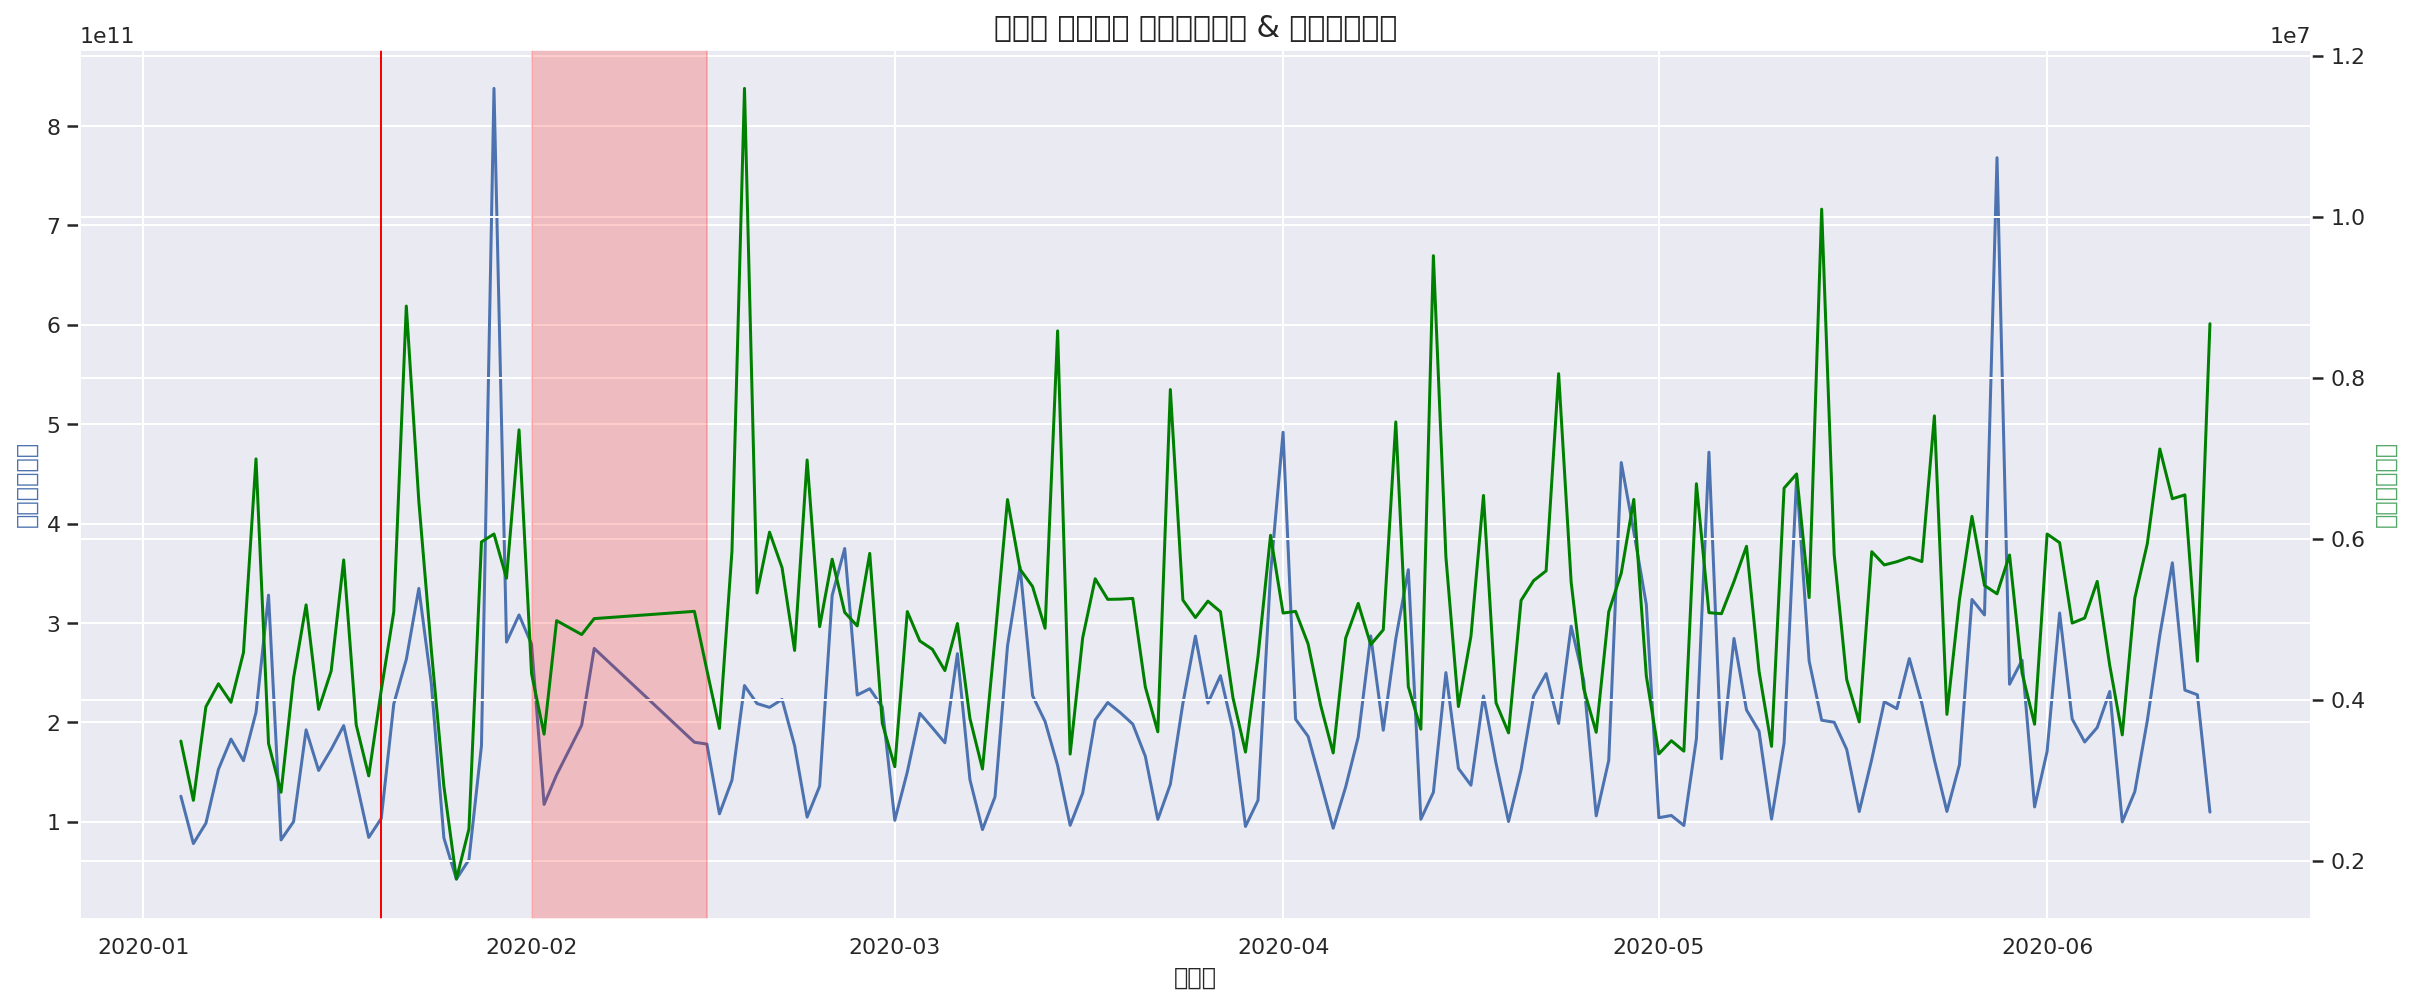

In [20]:
fg, ax1 = plt.subplots()
fg.set_size_inches(20,8)

ax2 = ax1.twinx()
ax1.plot(cards_day.index, cards_day['매출발생금액'], label="매출발생금액" )
ax2.plot(cards_day.index, cards_day['매출발생건수'], color="green", label='매출발생건수')

ax1.set_xlabel('일자별')

ax1.set_ylabel('매출발생금액', color='b')
ax2.set_ylabel('매출발생건수', color='g')

plt.axvspan(date2num(datetime(2020,1,20)), date2num(datetime(2020,1,20)),  color="red")
plt.axvspan(date2num(datetime(2020,2,1)), date2num(datetime(2020,2,15)),  color="red", alpha=0.2)

plt.title('일자별 오프라인 매출발생금액 & 매출발생건수', size = 15)

plt.show()



오프라인 매출금액과 건수를 비교한 그래프입니다.
코로나19 국내 첫 확진자가 나온 1월 20일부터 오프라인 매출액과 건수가 모두 급격히 감소하였습니다.
2020/01/04 ~ 2020/06/14 일자별 오프라인 매출액 및 매출건수 변화를 살펴보았을 때, 2월 ~ 3월 사이 오프라인 전체 매출액과 건수가 눈에 띄게 주춤했다는 것을 알 수 있었습니다. 즉, 코로나19로 인해 오프라인 소비가 위축되었습니다.

In [ ]:
offcard['대분류'].unique()

del offcard['행정동코드']
del offcard['업종코드']

cards_count = offcard.iloc[ : , [2,5]]

tmpcount = pd.pivot_table( cards_count, index=['사용일'], columns=['대분류'], aggfunc=np.sum ) 

tmpcount.columns = tmpcount.columns.levels[1]

# 결측치를 0으로 채움
tmpcount = tmpcount.fillna(0)

# 소비변화파악에 불필요한 데이터는 제거
# '건축자재', '기타', '기타서비스', '판매(국가)','회원제서비스'
tmpcount = tmpcount.iloc[ : , [0,1,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31]]

가맹점별 오프라인 매출 건수 변화를 살펴보겠습니다.
각 가맹점별 특성으로 인해 소비횟수가 달라지므로, 각 가맹점별 그래프 선의 형태의 변화를 보았습니다. 2월~3월 사이 소비가 주춤하거나 감소했다는 것을 확실히 알 수 있습니다.

Text(0.5, 1.0, '2020/01/04 ~ 2020/06/14 가맹점별 오프라인 매출발생건수 합계 TOP6')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47609 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

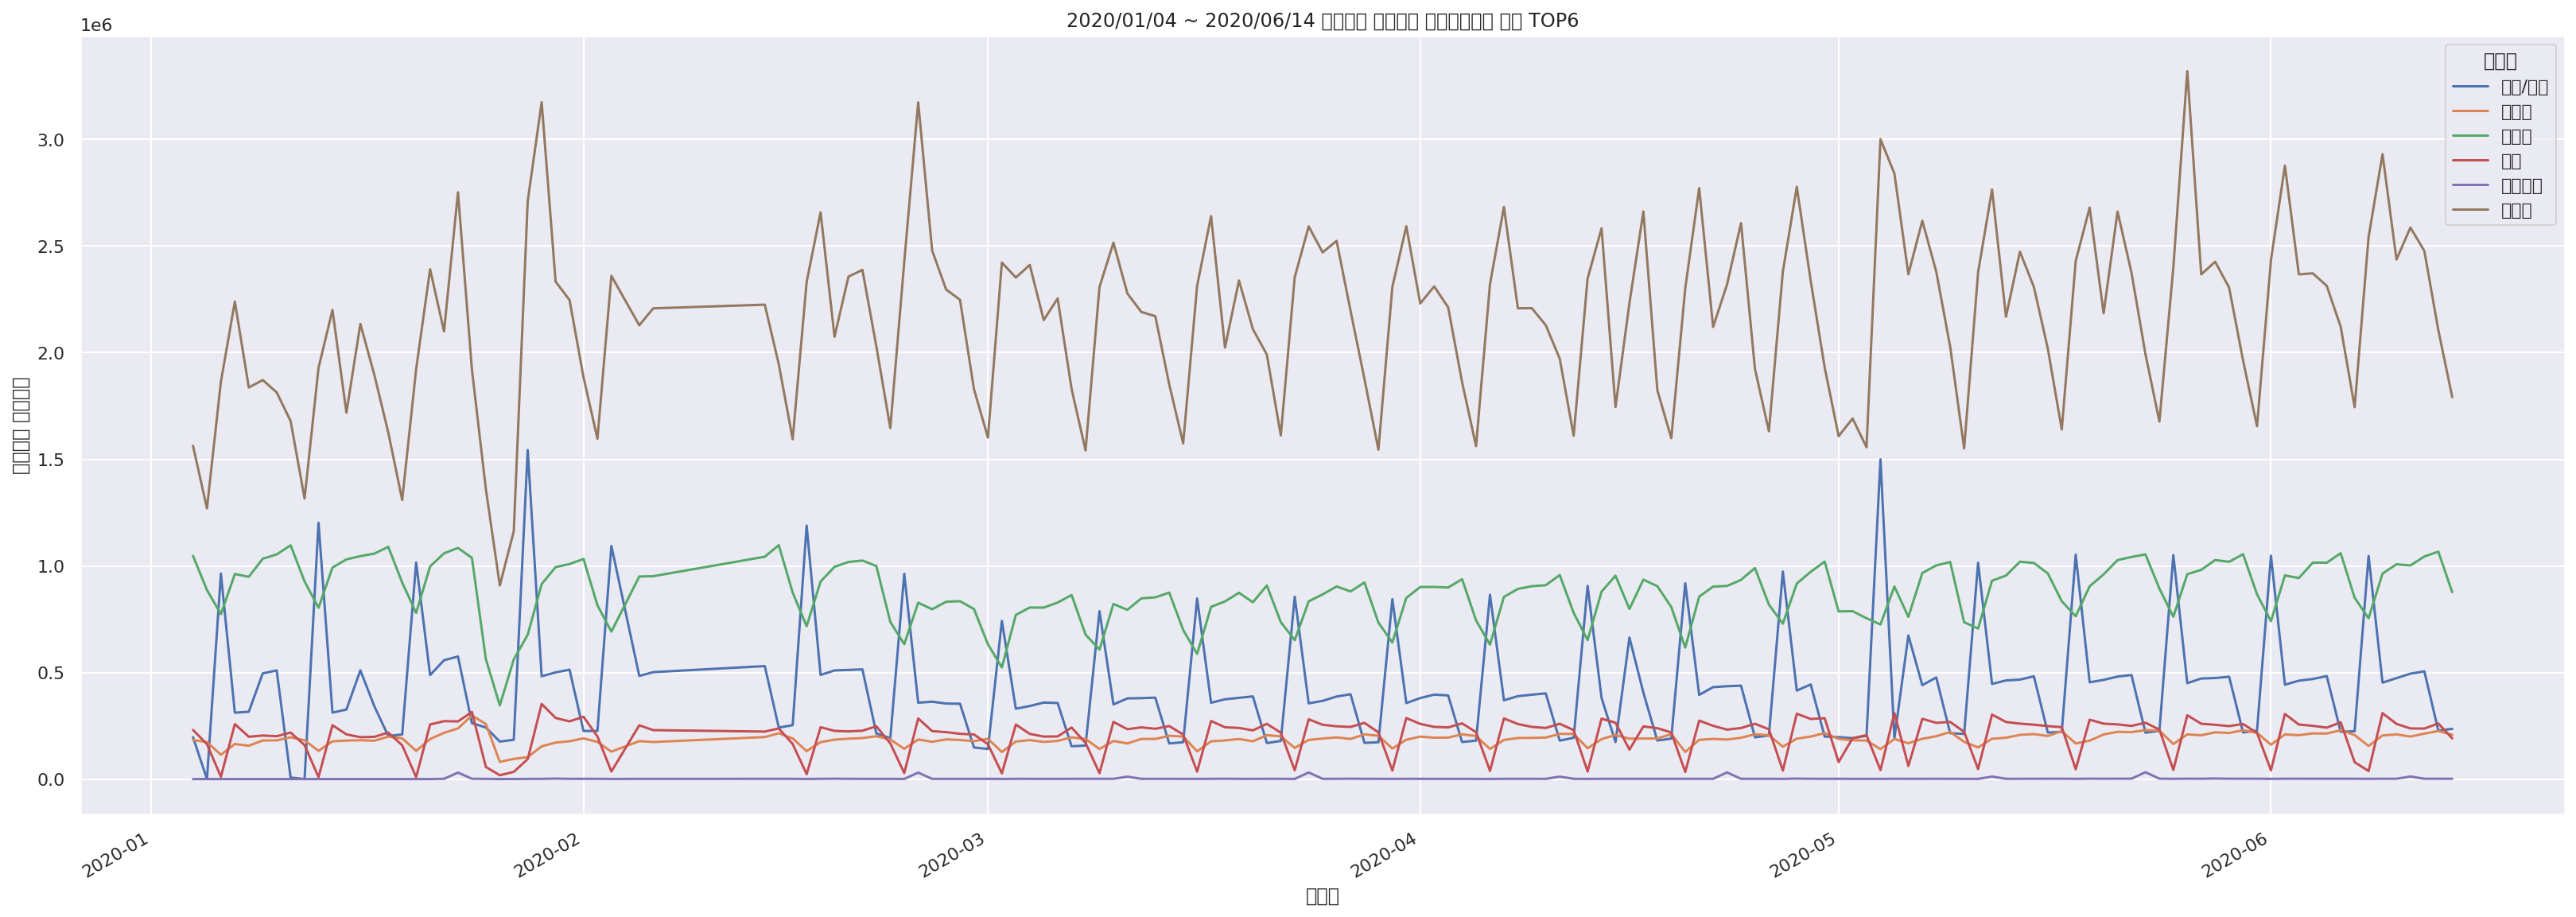

In [ ]:
tmpcount.iloc[:,[3,13,15,17,23,26]].plot(figsize=(28,10))

plt.ylabel('가맹점별 매출건수')
plt.title('2020/01/04 ~ 2020/06/14 가맹점별 오프라인 매출발생건수 합계 TOP6')


가맹점 중에서도 소비 건수가 많은 6개의 카테고리만 그래프로 나타내었습니다.
2월~3월 사이 평소 소비형태가 주춤했다는 것을 각 가맹점별 그래프 선의 형태를 통해 확인할 수 있었습니다.

### 요식업종 매출발생금액 변화

In [ ]:
cards_sales = offcard.iloc[ : , [3,5]]

tmpsales = pd.pivot_table( cards_sales, index=['사용일'], columns=['대분류'], aggfunc=np.sum ) 

tmpsales.columns = tmpsales.columns.levels[1]

# 결측치를 0으로 채움
tmpsales = tmpsales.fillna(0)

# 소비변화파악에 불필요한 데이터는 제거
# '건축자재', '기타', '기타서비스', '판매(국가)','회원제서비스'
tmpsales = tmpsales.iloc[ : , [0,1,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31]]

In [ ]:
cards_sales['day'] = cards_sales.index

tmp = cards_sales.groupby(['대분류'], as_index=False).sum()
tmp.index=='2020-01-04'

tmp['per'] = np.nan
for i in range(0, len(tmp) ):
  tmp['per'][i] = ( tmp['매출발생금액'][i] / tmp['매출발생금액'].sum() ) * 100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:122: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, '2020/01/04 ~ 2020/06/14 요식업종에 대한 매출발생금액 변화')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50836 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49885 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51333 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

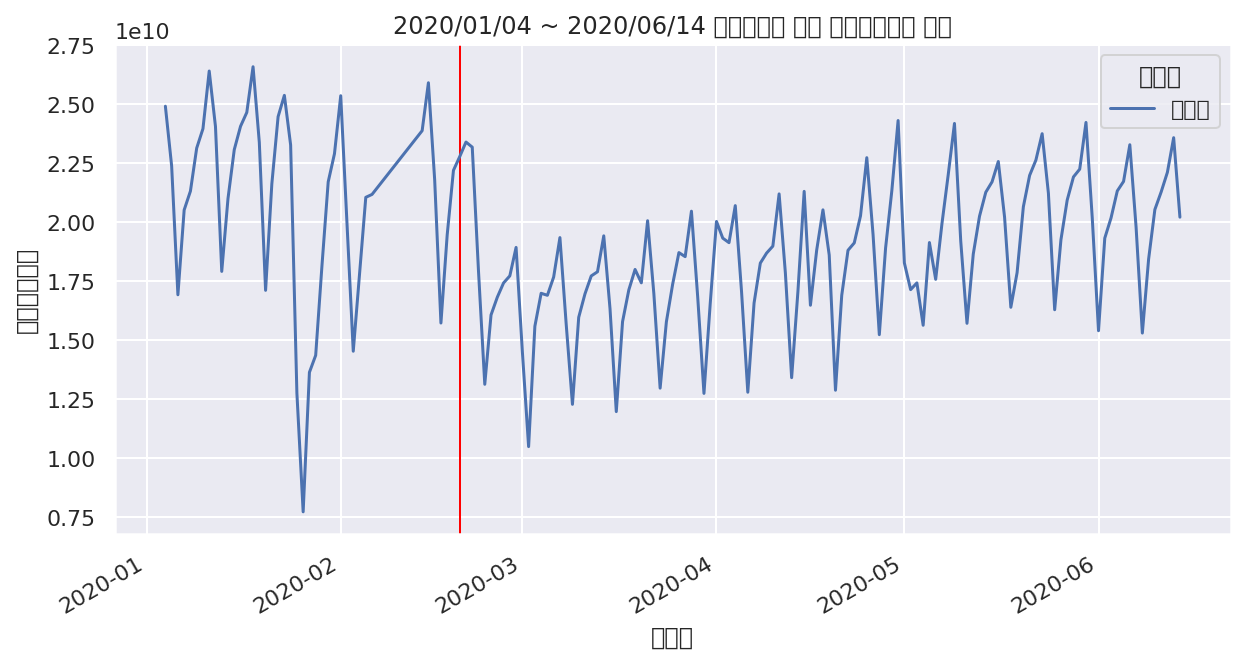

In [ ]:
tmpsales.iloc[:,[15]].plot(figsize=(10,5))
plt.axvspan(date2num(datetime(2020,2,20)), date2num(datetime(2020,2,20)),  color="red")
plt.ylabel('매출발생금액')
plt.title('2020/01/04 ~ 2020/06/14 요식업종에 대한 매출발생금액 변화')


# 가맹점별 오프라인 매출금액 추이를 보면, 
# 1월초 증가 -> 불안심리로 마스크, 생필품 등 사재기 현상 발생
# 4월말 증가 -> 재난지원금 지급, 억압된 상황 해소 및 계절에 따른 봄맞이 활동 가능성

2월 20일(5주차)을 기점으로, 코로나19로 인해 오프라인 요식업종 매출발생금액이 감소하였습니다. 이는 코로나19 상황이 요식업종에 영향을 끼쳤음을 확인할 수 있었습니다. 

In [ ]:
offcard['사용일'] = offcard.index

offcard['tmp'] = range(1,len(offcard)+1)

offcard.set_index('tmp')

card_catm = offcard[ ['사용일','매출발생금액','대분류'] ]
card_catm = card_catm.groupby(['사용일','대분류'], as_index=False).sum()

ValueError: ignored

### 가맹점별 전일대비 매출액 증감율

In [ ]:
# 매출발생금액 증감율 확인하기
# 결측치 있는 대분류 제거 ====> 농업,문화/취미,보험,유흥업,주방용품,직물,통신판매 제거  <===== 우리에게 의미없는 데이터이기도 했음
tmpsales= tmpsales.iloc[ : , [0,1,2,3,5,6,8,10,11,12,13,14,15,17,18,19,20,21,22,26,27]]

# 1. 증감율 보여줄 df 생성(기존형태유지를 위해 사본 뜨기)
df_growth = tmpsales[:]

# 2. 계산된 증감율 값 넣기!
# df_growth : 품목별 계산된 증감율 값 df
# tmpsales : 품목별(컬럼), 날짜별(인덱스) 매출금액 df

for i in range(len(df_growth.columns) ):
  growth_rate = []
  for j in range(0,len(tmpsales)):
    if j == 0:
      growth_rate.append(0)
    else:  
      rate = round( ( ( tmpsales[tmpsales.columns[i]][j] - tmpsales[tmpsales.columns[i]][j-1] ) / tmpsales[tmpsales.columns[i]][j-1] ) * 100 )
      growth_rate.append(rate)
  df_growth[ df_growth.columns[i] ] = growth_rate


코로나19 전후 눈에 띄게 매출액 변화가 있는 가맹점 업종 2곳(교통/운송, 의료)과 식품관련 업종 2곳(식료품, 요식업)을 확인해보았습니다.

코로나19 이전에는 계절의 특성상 방학 및 휴가, 해외여행 등으로 인해 교통/운송업종의 소비매출이 크게 증가한다는 것을 감안한다고 하더라도, 코로나19 이후 매출이 급격히 감소한 뒤 눈에 띄게 매출액 증감 형태가 보이지 않았습니다.      



코로나19 국내 첫 확진자 발생일인 1월 20일을 기준으로 교통/운송, 의료 업종의 매출액은 급격히 감소한 후, 코로나 이전의 상황으로 회복하지 못하고 있음을 확인하였습니다. 이는 대면 활동이 주를 이루는 업종의 특성으로 인해 이전 상황으로 회복하기 위해서는 비대면 서비스 전환의 필요성을 알 수 있는 대목입니다.



Text(0.5, 1.0, '2020/01/04 ~ 2020/06/14 가맹점별 오프라인 전일대비 매출액 증감율(식료품)')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47609 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

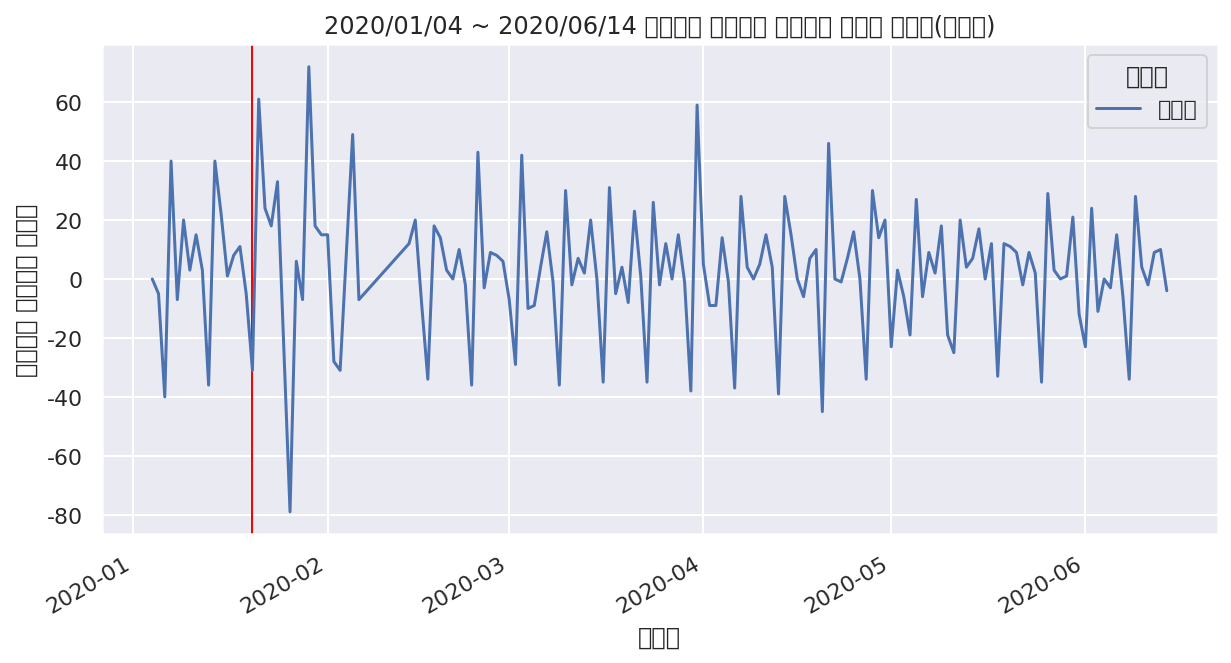

In [ ]:
df_growth.iloc[:,[10]].plot(figsize=(10,5))
plt.axvspan(date2num(datetime(2020,1,20)), date2num(datetime(2020,1,20)),  color="red")
plt.ylabel('가맹점별 전일대비 매출액')
plt.title('2020/01/04 ~ 2020/06/14 가맹점별 오프라인 전일대비 매출액 증감율(식료품)')

Text(0.5, 1.0, '2020/01/04 ~ 2020/06/14 가맹점별 오프라인 전일대비 매출액 증감율(요식업)')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50857 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47609 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

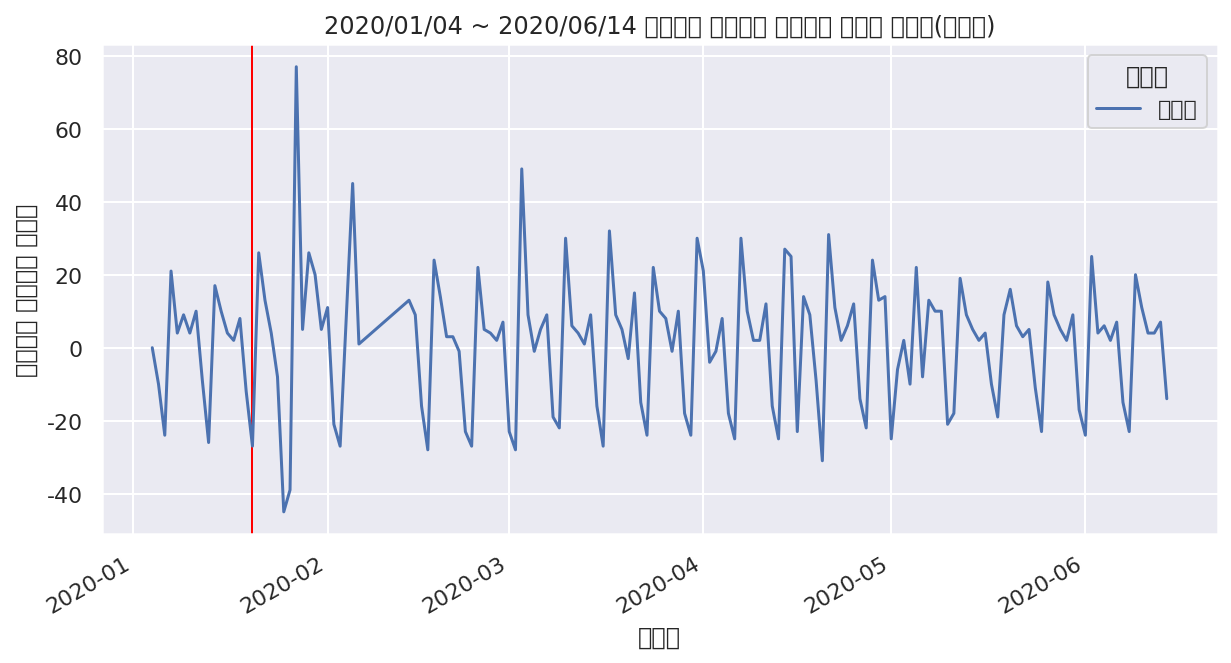

In [ ]:
df_growth.iloc[:,[12]].plot(figsize=(10,5))
plt.axvspan(date2num(datetime(2020,1,20)), date2num(datetime(2020,1,20)),  color="red")

plt.ylabel('가맹점별 전일대비 매출액')
plt.title('2020/01/04 ~ 2020/06/14 가맹점별 오프라인 전일대비 매출액 증감율(요식업)')

식료품과 요식업종의 경우에는 코로나19 국내 첫 확진자가 발생한 1월 20일을 기준으로 전일대비 매출액이 크게 감소하였으나, 빠르게 회복하는 모습을 확인할 수 있었습니다. 따라서 식료품과 요식업종은 코로나19 상황으로 잠깐의 타격은 존재하였으나 이러한 재난 상황속에서도 경기에 크게 영향을 받지 않는 업종이라는 사실을 확인할 수 있었습니다.


## 온라인 쇼핑 동향조사 데이터 분석

- 출처 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10041&conn_path=I2

In [ ]:
#온라인 쇼핑 데이터 불러오기
path = '/content/drive/My Drive/Phoenix/PJM/OnlineShoppingData/onlineshopping.csv'
OnlineShopping = pd.read_csv(path, encoding='CP949')

In [ ]:
# 온라인 쇼핑 데이터프레임 컬럼<->인덱스
OnlineShopping = OnlineShopping.T
# 상품군별로 컬럼명 변경
OnlineShopping.columns = OnlineShopping.loc['상품군별']
# 필요없는 데이터 없앰
OnlineShopping=OnlineShopping.iloc[7:-1,:]
# 합계데이터만 남기기
OnlineShopping = OnlineShopping.iloc[:,[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69]]


In [ ]:
# 데이터타입 int로 변경
cols = OnlineShopping.columns
for col in cols:
  OnlineShopping[col]=OnlineShopping[col].apply(lambda x:int(x))
# 인덱스명 변경
index_li=list()
for i in range(len(OnlineShopping.index)):
  index_li.append(f'{OnlineShopping.index[i][0:4]}-{OnlineShopping.index[i][-4:-2]}')
OnlineShopping.index = index_li 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50728 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46972 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51064 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49660 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54609 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

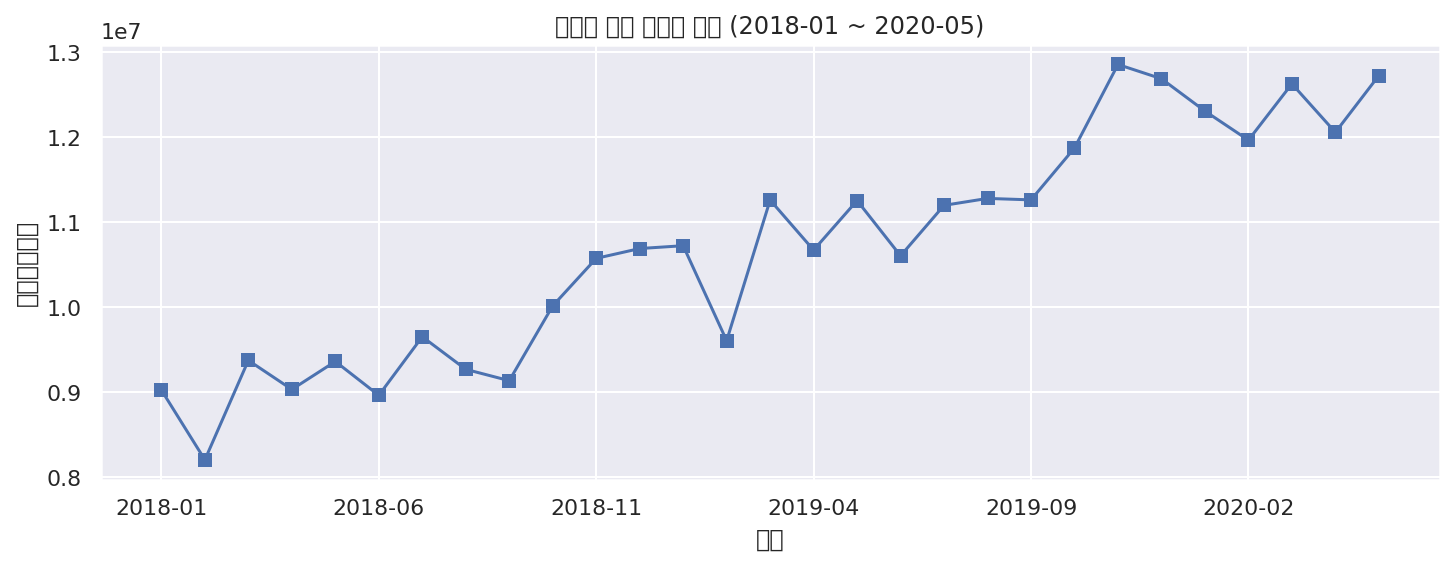

In [ ]:
# 온라인 쇼핑 매출액 합계 시각화 (2018-01 ~ 2020-05)
plt.xlabel('월별')
plt.ylabel('매출발생금액')
plt.title('온라인 쇼핑 매출액 합계 (2018-01 ~ 2020-05)')
OnlineShopping.합계.plot(figsize=(12,4), marker='s')

### 2019-01 ~ 2020-05 기간 데이터 분석

In [ ]:
# 2019-01 ~ 2020-05 데이터 추출, OnlineShopping_2019_2020 df 생성
OnlineShopping_2019_2020 = OnlineShopping.loc['2019-01':, :]

In [ ]:
# 합계 데이터를 뺀 상품군별 매출 변화
# OnlineShopping_2019_2020.iloc[:,1:].plot(figsize=(20,10))

In [ ]:
# 2019-01 기준 상위 8개 상품군
# 로직 다시 짤 것
tmp = OnlineShopping_2019_2020.loc[:, ['여행 및 교통서비스', '가전·전자·통신기기', '음·식료품', '화장품', '생활용품', '컴퓨터 및 주변기기', '아동·유아용품', '의복']]

In [ ]:
# 시각화
tmp.plot(figsize=(12,6))

### 2019년과 2020년 01~05월 전년대비 동월 매출 증감률 비교

In [ ]:
# 01~05월 전년대비 동월 매출 증감률 비교를 위해 데이터 준비
a = list(OnlineShopping.index[:5])
b = list(OnlineShopping.index[12:17])
c = list(OnlineShopping.index[-5:])
a[0], b[0], c[0]

In [ ]:
# 증감률 계산
Change_sales = pd.DataFrame(columns=OnlineShopping.columns)
for idx in range(0,len(a)):
  tmp = (OnlineShopping.loc[ b[idx] ] - OnlineShopping.loc[ a[idx] ]) / OnlineShopping.loc[ a[idx] ] * 100 
  Change_sales.loc[f'{b[idx]}증감률'] = tmp

for idx in range(0,len(b)):
  tmp = (OnlineShopping.loc[ c[idx] ] - OnlineShopping.loc[ b[idx] ]) / OnlineShopping.loc[ b[idx] ] * 100 
  Change_sales.loc[f'{c[idx]}증감률'] = tmp

In [ ]:
# 전년대비 동월 매출 증감률 비교
tmp1=Change_sales.iloc[:,12:13].T
plt.figure(figsize=(12,6))
label = ['1월', '2월', '3월', '4월', '5월']
plt.plot(label, tmp1.loc['음·식료품'][:5], marker='s')
plt.plot(label, tmp1.loc['음·식료품'][5:], marker='s')

plt.title('전년대비 동월 매출 증감률 비교')
plt.ylabel('증감률(%)')
plt.xlabel('월')
plt.legend(['2019년', '2020년'])
plt.show()

### 코로나와 온라인 음식료품 판매금액 상관관계분석


In [ ]:
# 2020-01 ~ 2020-05 데이터만 추출하고 전처리
onlineshopping_2020=OnlineShopping[24:][['합계','음·식료품']]
dic = {
    'month' : onlineshopping_2020.index,
    'sales_sum' : onlineshopping_2020['합계'],
    'food_sum' : onlineshopping_2020['음·식료품']
}
onlineshopping_2020 = pd.DataFrame(dic)
onlineshopping_2020.reset_index(inplace=True, drop=True)

In [ ]:
# 회귀 분석을 위한 전처리
dic = {
    'month' : covid_monthly.index,
    'confirmed' : covid_monthly['confirmed']
}
covid_monthly = pd.DataFrame(dic)
covid_monthly.reset_index(inplace=True, drop=True)

In [ ]:
# covid_monthly와 onlonlineshopping_2020 합치기
covid_online =covid_monthly.merge(onlineshopping_2020,how='left',on='month')

In [ ]:
# 상관관계 분석
tmp = np.corrcoef( covid_online['confirmed'], covid_online['food_sum'])
# R²
round(np.sum(np.tril(tmp, k=-1)) ** 2, 4)
# R²이 0.7이상으로 상관관계가 높다

In [ ]:
# 시각화
fg, ax1 = plt.subplots()
fg.set_size_inches(12,8)

ax2 = ax1.twinx()
ax1.plot(covid_online['month'], covid_online['confirmed'], marker='s')
ax2.plot(covid_online['month'], covid_online['food_sum'], marker='o', color="green" )

ax1.set_xlabel('월')

ax1.set_ylabel('확진자수', color='b')
ax2.set_ylabel('온라인음식료품매출액', color='green')



plt.title('확진자수와 온라인쇼핑 매출액 비교', size = 15)

plt.show()

## 품목별 소비지수


In [ ]:
# 데이터 준비(index 데이터)
path = '/content/drive/My Drive/Phoenix/Dacon_Data/index.csv'
index_raw = pd.read_csv( path )

In [ ]:
# 컬럼명 한글 변경
index_raw.columns = ['기준월', '대분류', '중분류', '나이대', '성별', '지역', '세부지역','성장지수']

# 타입 변경
index_raw['기준월'] = index_raw['기준월'].astype('object')

# 컬럼에 있는 사용일 타입 변경
day=list()
for i in range(127525):
  day.append(f'{str(index_raw.기준월[i])[:4]}-{str(index_raw.기준월[i])[4:6]}')

index_raw['기준월']=day

In [ ]:
# ★ cgi : 카테고리성장지수 (2018년 월평균 대비 매출 성장 비율, 100을 기준으로 이상이면 매출 상승, 이하면 하락)
plt.figure(figsize=(20,6))
sns.pointplot(x = '기준월', y = '성장지수', hue='대분류' , data = index_raw)

# 본론

온, 오프라인 소비 형태를 비교해보면서 온라인 식품산업이 코로나에 큰 영향을 받지 않았다는 사실을 확인했습니다.

그렇다면 사람들의 식생활 소비는 코로나 이후로 어떻게 변했는지 알아보도록하겠습니다.

최근 자료를 제공하는 국민카드의 데이터를 이용하였습니다.

## 식생활 변화 분석 - 국민카드 데이터 분석

- foodlife: 식생활 업종별 이용금액 비중 변화
  - 출처 : https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=4311a990-bf3e-11ea-b750-f709623afb72
- homefood: 연령대별 집밥 카테고리별 이용금액 변화율
  - 출처 : https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=c1465130-bf3e-11ea-a506-cf31c4c94055

In [ ]:
# 데이터 불러오기
path1 = '/content/drive/My Drive/Phoenix/Extra_Data/KBcard_data/FoodLife.xlsx'
foodlife=pd.read_excel(path1)
path2 = '/content/drive/My Drive/Phoenix/Extra_Data/KBcard_data/Homefood.xlsx'
homefood=pd.read_excel(path2)

In [ ]:
# 데이터 퍼센트로 바꾸기
foodlife.iloc[:,2:] = foodlife.iloc[:,2:].apply(lambda x:round(x*100,2))
homefood['19년대비 성장률'] = homefood['19년대비 성장률'].apply(lambda x:round(x*100,2))

In [ ]:
# 데이터 전처리
foodlife=foodlife.T
foodlife.columns=['2019_음식점', '2019_집밥', '2019_배달앱', '2020_음식점', '2020_집밥', '2020_배달앱']
foodlife=foodlife.iloc[2:,:]

In [ ]:
# # 코로나 기간 식생활 소비 변화
# plt.figure()
# ax = foodlife.iloc[:,3:].plot(kind='bar', stacked=True, rot=45, figsize=(15,9))
# for p in ax.patches: 
#   left, bottom, width, height = p.get_bbox().bounds 
#   ax.annotate("%.2f %%"%height, (left+width/2, bottom+height/2), ha='center', va='center')
# plt.axvspan(2.5, 4.5, 0, 100, facecolor='red', alpha=0.2)
# plt.ylim(0,100)
# plt.ylabel('퍼센트')
# plt.xlabel('시기(14일 간격)')
# plt.title('2020년 식생활 소비 비율 변화')
# plt.show()
# # 한글이 깨져서 이미지로 첨부
Image.open('/content/drive/My Drive/Phoenix/image/KB1.jpg')

코로나가 가장 많이 확산했던 기간 동안 식생활 소비 비중을 보면 음식점은 60퍼센트대로 줄어들고 집밥 카테고리가 20% 이상으로 배달앱은 10%대로 늘어났습니다. 집밥에 대한 소비가 약 4%p가 증가한 것을 확인


In [ ]:
# # 집밥 시각화
# plt.figure(figsize=(15,9))
# plt.bar(foodlife.index, foodlife['2020_집밥'], facecolor='#9999ff', edgecolor='white')
# plt.bar(foodlife.index, -(foodlife['2019_집밥']), facecolor='#ff9999', edgecolor='white')
# for x,y in zip(foodlife.index, foodlife['2020_집밥']):

#     label = f"{y:.2f}%"

#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center')
    
# for x,y in zip(foodlife.index, foodlife['2019_집밥']):

#     label = f"{y:.2f}%"

#     plt.annotate(label, # this is the text
#                  (x, -y), # this is the point to label
#                  ha="center", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  textcoords="offset points")
    
# plt.title('2019년과 2020년 집밥 카테고리 소비 비중 변화', fontdict={'fontsize': 15})
# plt.xlabel('시기(14일 간격)')
# plt.ylabel('퍼센트(%)')
# plt.xticks(rotation=45)
# plt.yticks(ticks=[-30, -20, -10, 0, 10, 20, 30],labels=['30','20','10','0','10','20','30'] )
# plt.legend()
# plt.ylim(-30, +30)
# plt.show()

# 한글이 깨져서 이미지로 첨부
Image.open('/content/drive/My Drive/Phoenix/image/KB2.jpg')

그렇다면 작년과 비교했을때 집밥 카테고리의 비중 변화는 어땠을까요?
위의 그래프에서 확인할 수 있다시피 비중이 증가했습니다.


In [ ]:
# 연령별 19년대비 집밥 카테고리 소비 성장률

plt.figure(figsize=(20,10))
sns.barplot(x='집밥 종류 구분', y='19년대비 성장률', hue='연령대', data=homefood)
sns.set(style="darkgrid")
plt.title('The consumption growth rate of the homefood category compared to the 2019-2020 by age')

집밥의 세분화된 카테고리별 성장률을 확인해보았습니다

주목할 점은 온라인에서 식료품과 밀키트가 200% 이상 증가한 것입니다.

특히 중장년층인 40~60대의 성장률이 큰것이 눈에 띕니다.

이는 오프라인의 주고객층이었던 **40~60대가 온라인 소비자군으로 새로 편입**되었다는 것을 의미합니다.

안쓰면 안썼지 한 번 쓰기 시작하면 재사용율이 높은 온라인 구매 시장 특성 상 새로 편입된 소비자군들이 지속적인 구매를 할 확률이 높습니다.

그리고 다른 연령대보다 경제적으로 여유가 있는 중장년층이므로 이들을 공략하면 큰 매출을 기대할 수 있습니다.


In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/phoenix4.jpg')

## 밀키트란?
- 한 끼 식사 분량의 계량화된 식재료와 요리설명서를 담은 형태의 식품상품이다.
- 쿠킹박스라고도 한다.

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/mealkit02.png')

국내 밀키트 업체 현황

2016년부터 밀키트 스타트업이 출현했다.
점차 대형 식품제조사와 유통업체가 진출하였고 대형 유통업체는 오프라인 판매에서 배송으로 판매로를 바꾸는 추세이다.
보도자료에 따르면 프레시지의 4월 판매 매출이 전년 동월 대비 4.7배 증가했고 마이셰프는 3월 매출이 400% 이상 성장했다.


In [ ]:
# 국내 밀키트 업체 현황
Image.open('/content/drive/My Drive/Phoenix/image/mealkit03.png')

## 밀키트 산업 동향과 유망성


코로나19로 인한 개학연기, 재택근무 등으로 가정 내 머무르는 시간이 늘어간 가운데 외식이 줄었고 가정간편식(HMR)의 소비가 확대되었다.

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/mealkitnews.png')

#### 정부 정책
5대 유망 식품 육성을 통한 식품 산업 활력 제고 대책 
- 2019년 12월 정부의 "5대 유망 식품분야" 집중 육성 계획을 발표했다 식품 관련 5개의 뷴야의 유망 분야를 선정하여 다방면으로 적극 지원할 계획이다. 세계 식품 시장이 꾸준히 증가하고 있고, 국내 수요도 빠르게 증가하면서 정부는 기능성 표시제도입, 맞춤형 건기식 판매 허용등  규제를 개선하여 시장 확대와 일자리 창출을 지원할 계획이다

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/jeongchak.png')

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/phoenix4.jpg')

### 온오프라인 식품군 성장률

- 산업통상자원부_주요 유통업체 26개사 온오프라인 식품군 월간 전년동기대비 성장률
  - 출처 : https://www.data.go.kr/data/15061361/fileData.do

In [ ]:
path = '/content/drive/My Drive/Phoenix/Extra_Data/onoff_food_20200531.csv'
onoff = pd.read_csv(path, encoding='CP949')

In [ ]:
onoff['년월'] = onoff['년월'].astype('datetime64[ns]')

onoff.columns = ['월별', '오프라인성장률', '온라인성장률', '전체성장률']

onoff.set_index('월별', inplace=True)

In [ ]:
plt.figure()
onoff.iloc[:,:].plot(figsize=(14,6))

plt.ylabel('성장률')
plt.title('주요 유통업체 대상 온/오프라인 전년동기대비 성장률')

- 주요 유통업체 오프라인 13개사, 온라인 13개사 및 전체 26개사 전년 동월 대비 식품군 매출액 성장률 확인해보겠습니다.
- 오프라인 대비 온라인의 성장률이 2020년 이후(코로나19 직후)로 급격히 증가 양상이 보입니다.

### 주요 식품 품목별 생산실적-출하액기준 상위20개 품목
- 출처 https://www.atfis.or.kr/html/report/2014/RPT_FFS_40_19_4.html
- FIS 식품산업통계정보

In [ ]:
# 2018년 데이터
path18 = '/content/drive/My Drive/Phoenix/Extra_Data/2018.xlsx'
production2018 = pd.read_excel(path18,header=4,skipfooter=4)
# 2017년 데이터
path17 = '/content/drive/My Drive/Phoenix/Extra_Data/2017.xlsx'
production2017 = pd.read_excel(path17,header=4,skipfooter=4)
# 2016년 데이터
path16 = '/content/drive/My Drive/Phoenix/Extra_Data/2016.xlsx'
production2016 = pd.read_excel(path16,header=4)
#2015년 데이터
path15 = '/content/drive/My Drive/Phoenix/Extra_Data/2015.xlsx'
production2015 = pd.read_excel(path15,header=4)

In [ ]:
# 2015,2016년도 데이터와 맞추기 위해 2018,2017년도 데이터 컬럼 수정

dic18 = {
    production2018.columns[0]:'순위',
    production2018.columns[1] :'품목',
    production2018.columns[2] :'식품군'
}
production2018.rename(columns=dic18, inplace=True)

dic17 = {
    production2017.columns[0]:'순위',
    production2017.columns[1] :'품목',
    production2017.columns[2] :'식품군'
}
production2017.rename(columns=dic17, inplace=True)

In [ ]:
index = list()
for i in range(len(production2018)):
  x = production2018['식품군'][i]
  y = production2018['품목'][i]
  z = x + '-' + y
  index.append(z)
production2018['품목'] = index
production2018.drop(['식품군'],axis=1, inplace=True)

In [ ]:
index = list()
for i in range(len(production2017)):
  x = production2017['식품군'][i]
  y = production2017['품목'][i]
  z = x + '-' + y
  index.append(z)
production2017['품목'] = index
production2017.drop(['식품군'],axis=1, inplace=True)

In [ ]:
dic16 = {
    production2016.columns[0]:'순위',
    production2016.columns[1] :'품목',
}
production2016.rename(columns=dic16, inplace=True)

dic15 = {
    production2015.columns[0]:'순위',
    production2015.columns[1] :'품목',
}
production2015.rename(columns=dic15, inplace=True)

In [ ]:
# 2015년
x = production2015['품목']
y = production2015['출하액(천원)']
plt.figure()
plt.barh(x,y)
plt.grid()
plt.show()

In [ ]:
# 2016년
x = production2016['품목']
y = production2016['출하액(천원)']
plt.figure()
plt.barh(x,y)
plt.grid()
plt.show()

In [ ]:
# 2017년
x = production2017['품목']
y = production2017['출하액(천원)']
plt.figure()
plt.barh(x,y)
plt.grid()
plt.show()

In [ ]:
# 2018년
x = production2018['품목']
y = production2018['출하액(천원)']
plt.figure()
plt.barh(x,y)
plt.grid()
plt.show()

주요 식품 품목별 생산실적-출하액기준 상위20개 품목
- 편의성, 시간단축, 가성비로 급성장하는 즉석식품
- 1인가구의 증가, 여성의 사회진출,저출산, 고령화에 따른 사회 구조 변화에 달라진 소비 성향
- 집에서 간단히 해먹을수있다는 장점으로 주목받는 식품 산업
- 4년간 즉석섭취·조리식품 등 지속적인 성장
- 점차 다양해지는 즉석식품, 식품업체의 개발 → 즉석식품이 미래세대의 식품으로 기대

### 품목별 POS 소매점 매출액
- 출처 http://www.atfis.or.kr/sales/M002020000/search.do
- atfis 식품산업통계정보
- 품목별 POS 소매점 매출액 자료는 기업의 경영 및 마케팅/영업 활동을 지원하는 목적으로 제공되고 있습니다. 해당 자료는 비영리목적으로만 사용이 가능하며, 무단으로 기사화 혹은 인용시에는 법적 불이익을 받을 수 있습니다.

In [ ]:
path = '/content/drive/My Drive/Phoenix/KRU/품목별POS 소매점매출액.xlsx'
pos_amount = pd.read_excel(path)
pos_amount.head(2)

In [ ]:
pos_amount.rename(columns = {'Unnamed: 0' : '년도'}, inplace = True)

In [ ]:
plt.figure()
plt.plot(pos_amount['년도'],pos_amount['매출액(백만원)'])
plt.grid()
plt.xlabel('년도')
plt.ylabel('매출액(백만원)')
plt.title('연도별 즉섭섭취조리식품 매출액')
plt.show()

년도별 즉섭섭취조리식품 매출액

HMR 시장은 지속적으로 성장하고 있으며, 
특히 2016년부터 성장이 가속화되고 있음

2020년 6월 식품의약안전처의 보도자료에 따르면  "국내 가정간편식 시장은 ’18년 약 3조원에서 ’24년 8조원 이상의 시장으로, 이 중 새롭게 부상하는 밀키트 시장은 ‘17년 200억에서 ’24 년 7,000억 시장으로 급격히 성장할 것으로 예상"

### 네이버 데이터랩 (쇼핑인사이트)
- https://datalab.naver.com/shoppingInsight/sCategory.naver
- 쿠킹박스 클릭량 추이
- 2019.7.28 - 2020.7.28 
- 40대, 50대, 60대 이상

In [ ]:
path4 = '/content/drive/My Drive/Phoenix/Extra_Data/40대naver_datalab_shoppingInsight_category_일간_data_20200729151313.csv'
naver_40s = pd.read_csv(path4, header=7)
path5 = '/content/drive/My Drive/Phoenix/Extra_Data/50대naver_datalab_shoppingInsight_category_일간_data_20200729151328.csv'
naver_50s = pd.read_csv(path5, header=7)
path6 = '/content/drive/My Drive/Phoenix/Extra_Data/60대naver_datalab_shoppingInsight_category_일간_data_20200729151507.csv'
naver_60s = pd.read_csv(path6, header=7)
path0 = '/content/drive/My Drive/Phoenix/Extra_Data/10대_60대이상naver_datalab_shoppingInsight_category_일간_data_20200729152002.csv'
naver_total = pd.read_csv(path0, header=7)

In [ ]:
naver_40s['날짜'] = pd.to_datetime(naver_40s['날짜'])
naver_50s['날짜'] = pd.to_datetime(naver_50s['날짜'])
naver_60s['날짜'] = pd.to_datetime(naver_60s['날짜'])
naver_total['날짜'] = pd.to_datetime(naver_total['날짜'])

In [ ]:
naver_40s.rename(columns = {'쿠킹박스' : '40대'}, inplace = True)
naver_50s.rename(columns = {'쿠킹박스' : '50대'}, inplace = True)
naver_60s.rename(columns = {'쿠킹박스' : '60대'}, inplace = True)
naver_total.rename(columns = {'쿠킹박스' : '전체연령'}, inplace = True)

In [ ]:
newData1 = pd.merge( naver_40s, naver_50s, on='날짜')
newData2 = pd.merge( newData1, naver_60s, on='날짜')
newData = pd.merge( newData2, naver_total, on='날짜')

In [ ]:
# 40~60대 쿠킹박스 클릭량 추이
plt.figure(figsize=(12,6))
x = plt.plot(newData['날짜'],newData['40대'],label='40대')
y = plt.plot(newData['날짜'],newData['50대'],label='50대')
z = plt.plot(newData['날짜'],newData['60대'],label='60대')
plt.grid()
plt.xlabel('날짜')
plt.ylabel('클릭량')
plt.title('연령별 쿠킹박스 클릭량 추이 2019.07.28. ~ 2020.07.28')
plt.axvspan(date2num(datetime(2020,2,20)), date2num(datetime(2020,2,20)),  color="red")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
# 전체 연령 쿠킹박스 클릭량 추이
plt.figure(figsize=(12,6))
plt.plot(newData['날짜'], newData['전체연령'])
plt.grid()
plt.xlabel('날짜')
plt.ylabel('전체연령클릭량')
plt.axvspan(date2num(datetime(2020,2,20)), date2num(datetime(2020,2,20)),  color="red")
plt.title('전체 연령 쿠킹박스 클릭량 추이 2019.07.28. ~ 2020.07.28')
plt.show()

쿠킹박스(밀키트) 관심도 증가

2020-2-20 코로나 기준점 이후 클릭량 증가

- 식품음료신문에 따르면 "‘밀키트’ 코로나 수혜 종목…올해 3배 성장한 2000억 예상
실제 밀키트는 코로나 사태를 거치며 급격한 성장세를 이루고 있다. 국내 밀키트 시장의 약 70%를 점유하고 있는 프레시지는 올해 4월 기준 가정용 밀키트 매출이 작년 4월과 비교해 4.7배 늘었고, 이 기간 음식점에 공급하는 밀키트 매출도 2배 넘게 증가했다. 밀키트 전문기업 마이셰프 역시 3월 매출이 전년 동월 대비 400% 이상 성장했다."
 
- 소비자의 니즈 커지고 있다


# 결론


## 분석 요약
- 변화 : 코로나로 40-60대가 온라인 식품 소비자군으로 편입되었다.
- 변화로 인한 유망산업 : 40-60대의 밀키트 온라인 구매가 늘었으므로 40-60대를 위한 온라인 밀키트 산업이 유망하다.
  - 밀키트의 트렌드를 조사하여 소비자 니즈를 파악하고
  - 서비스 제시 - 식품업종에 종사하는 소상공인도 쉽게 밀키트를 제작하고 판매할 수 있는 '밀키트 제작 지원 사업'을 통해 밀키트 온라인 판매 플랫폼을 개발해서 40-60대를 공략해야 한다.

## 밀키트 트렌드 파악

밀키트의 최근 트렌드 동향을 파악하기 위해 통계청에서 간편식 관련 설문조사 데이터를 이용하여 간편식을 구입하는 이유와 간편식을 구입할 때 우선 확인하는 사항이 무엇인지, 식품소비 트렌드별 동조성을 살펴보고 인스타그램 태그 빈도수로 실제 사람들의 밀키트 인식이 어떤지 알아보겠습니다.

### 간편식(HMR) 구입 이유
- 출처
http://kosis.kr/statHtml/statHtml.do?orgId=114&tblId=DT_114053_057_2019&conn_path=I2
- 농림축산식품부,「가공식품소비자태도조사」
- 면접조사

In [ ]:
path = '/content/drive/My Drive/Phoenix/Extra_Data/간편식_HMR__구입_이유_20200727161622.xlsx'
hmr_survey = pd.read_excel(path,encoding='utf-8', header=1)

In [ ]:
hmr_survey = hmr_survey[:1]
hmr_survey.drop(['특성별(1)', '특성별(2)'], axis='columns', inplace=True)

In [ ]:
# 설문조사 답변 축약
dic = {
    hmr_survey.columns[0]:'비용절감',
    hmr_survey.columns[1] :'맛',
    hmr_survey.columns[2] :'요리의어려움',
    hmr_survey.columns[3] :'시간부족',
    hmr_survey.columns[4] :'편리성',
    hmr_survey.columns[5] :'다양성',
    hmr_survey.columns[6] :'낭비를줄임',
    hmr_survey.columns[7] :'보관성/휴대성',
    hmr_survey.columns[8] :'균형잡힌영양소',
    hmr_survey.columns[9] :'기타'

}
hmr_survey.rename(columns=dic, inplace=True)

In [ ]:
labels = [r'비용절감(17.1%)', r'맛(14.8%)', r'요리의어려움(7.4%)', r'시간부족(16.7%)', r'편리성(21.6%)',
 r'다양성(12.3%)', r'낭비를줄임(4.7%)', r'보관성/휴대성(4.7%)', r'균형잡힌영양소(0.8%)', r'기타(0.0%)']
sizes = [17.1 ,14.8 ,7.4 ,16.7 ,21.6 ,12.3 ,4.7 ,4.7 ,0.8 ,0.0]
colors=('firebrick','red','darksalmon','sienna','sandybrown','peru','tan','lightcoral','orange')
patches, texts = plt.pie(sizes, startangle=90,colors=colors)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

간편식을 구입하는 이유로 편리성이 21.6%로 1위에 꼽혔습니다. 2위로는 비용절감(17.1%), 약소한 차이로 시간부족(16.7%)이 그 다음 순위에 랭크되었습니다.
조리가 편리하고 비용과 조리시간을 절감할 수 있는 방향으로 제품을 개발해야합니다.

### 간편식(HMR) 품목별 구입 시 우선 확인하는 사항
- 출처 http://kosis.kr/statHtml/statHtml.do?orgId=114&tblId=DT_114053_056&conn_path=I2
- 농림축산식품부,「가공식품소비자태도조사」

In [ ]:
path = '/content/drive/My Drive/Phoenix/Extra_Data/간편식_HMR__품목별_구입_시_우선_확인하는_사항_20200728114603.xlsx'
hmr_check = pd.read_excel(path,encoding='utf-8', header=1)

In [ ]:
hmr_check = hmr_check[:1]
hmr_check.drop(['특성별(1)', '특성별(2)'], axis='columns', inplace=True)

In [ ]:
#기타 0.0 제외
labels = [r'용량(10.6%)', r'제조일자/유통기한(24.4%)', r'원산지(9.6%)', r'영양성분(9.3%)', r'식품첨가물(6.2%)',
 r'브랜드/상표/제조사(17.0%)', r'가격(11.9%)', r'제품포장/디자인(4.4%)', r'품질인증표시(1.7%)', r'기능성/식품의효능(4.7%)']
sizes = [10.6, 24.4, 9.6, 9.3, 6.2, 17.0, 11.9, 4.4, 1.7, 4.7]
colors=('olivedrab','lawngreen','lime','mediumspringgreen','lightseagreen','paleturquoise','darkcyan','darkturquoise','deepskyblue')
patches, texts = plt.pie(sizes, startangle=90,colors=colors)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

간편식을 구입할 때 우선하는 사항으로 제조일자/유통기한(24.4%)이 가장 많이 뽑혔습니다. 밀키트는 특성상 신선식품(야채 등)을 포함하고 있기 때문에 조리전 재료들의 보관기간을 늘릴 수 있는 방법을 보완해야합니다.
그 다음으로는 브랜드/상표/제조사(17%)로 꼽았는데 밀키트에 대한 관심이 구매로 이어지게 하려면 믿고 살 수 있어야 하는 제품이 필요합니다. 신뢰성 있는 제품이 경쟁력이 있을 것입니다.


### 식품소비 트렌드별 동조성(간편식)
- 출처 http://kosis.kr/statHtml/statHtml.do?orgId=114&tblId=DT_114053_133_2019&conn_path=I2
- 농림축산식품부,「가공식품소비자태도조사」

In [ ]:
path = '/content/drive/My Drive/Phoenix/Extra_Data/식품소비_트렌드별_동조성_간편식__20200728113903.xlsx'
trend_survey = pd.read_excel(path,encoding='utf-8', header=1)

In [ ]:
trend_survey = trend_survey[:1]
trend_survey.drop(['특성별(1)', '특성별(2)'], axis='columns', inplace=True)

In [ ]:
labels = [r'프리미엄(고급)제품(3.6%)', r'다양하고 새로운 맛(14.1%)', r'건강에 좋은 원료, 안전성이 확보된 제품(49.3%)', 
          r'소포장, 사용 및 취식/조리가 간편화된 제품(28.1%)', r'가격만 저렴하면 구입하겠다(5.0%)']
sizes = [3.6 , 14.1, 49.3, 28.1, 5.0]
colors=('cadetblue','lightblue','royalblue','midnightblue','cornflowerblue')
patches, texts = plt.pie(sizes, startangle=90,colors=colors)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

가격이 비싸도 건강에 좋은 원료, 안정성이 확보된 제품이면 구입하겠다라고 대답한 비율이 49.3%입니다. 
간편식의 경우 건강에 좋지 않다는 인식이 높은데 밀키트는 직접 조리를 한다는 점에서 다른 간편식에 비해 건강을 중요하게 여기는 소비자의 구매를 유도할 가능성이 높습니다.
가격이 비싸도 소포장, 간편화된 제품을 사겠다는 항목(28.1%)이 2위로 올랐습니다. 
조리 과정을 간편화한 밀키트가 이런 수요에 딱 맞아 떨어질 수 있습니다.


3가지의 설문조사를 통해 재구매율을 확대시켜 단골고객을 유지하는 방법을 찾기 위한 차별화 전략을 수립해보겠습니다.
1) 마케팅으로 조리과정의 편리성 홍보 
2) 유통과정을 줄여 제품의 신선도를 유지 
3) 유통기한을 늘릴 수 있는 방법 필요 
4) 건강에 좋고 안전한 재료 사용


### 인스타그램 태그로 알아보는 밀키트 트렌드

- 인스타 크롤링시 사용 코드


```
# selenium 설치
!pip install selenium

from selenium import webdriver as wd
import time
import pandas as pd
import re
from bs4 import BeautifulSoup

# 인스타 검색결과 링크 생성 함수
def insta_searching(word):
  url = 'https://www.instagram.com/explore/tags/'+word
  return url

# 첫번째 게시글 클릭하는 함수
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)

# 필요한 데이터 획득 함수
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html5lib')
    
    try:
        content = soup.select('div.C4VMK>span')[0].text
        date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
        tags = re.findall(r'#[^\s#,\\]+',content)
    except:
        content=' '
        date=' '
        tags=' '  
    
    data=[content, date, tags]
    return data

# 다음 게시글로 넘기는 함수
def move_next(driver):
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

# 드라이버 열기
driver = wd.Chrome('./tool/chromedriver.exe')

# 밀키트, 쿠킹박스 검색어로 2번 크롤링함
word = '쿠킹박스'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

select_first(driver)
results = list()

target = 1000   # 게시글 1000개 획득
for i in range(target):
    data=get_content(driver)
    results.append(data)
    move_next(driver)

results_df=pd.DataFrame(results, columns=['content', 'date', 'tags'])

# 중복 제거 후 파일로 저장
results_df.drop_duplicates(subset=['content'],inplace=True)
results_df.to_excel('./cookingbox.xlsx')
```



In [ ]:
# 크롤링 결과물 불러오기
path='/content/drive/My Drive/Phoenix/Extra_Data/Insta_tags/instaResults.xlsx'
instaResults = pd.read_excel(path)

In [ ]:
# 태그 데이터만 리스트로 만들기
insta_tags = list()

for tags in instaResults['tags']:
  tags_list = tags[2:-2].split("', '")
  for tag in tags_list:
    insta_tags.append(tag)

In [ ]:
# 공백데이터 제거
for i in range(114): 
  insta_tags.remove('')

In [ ]:
# 태그별 언급횟수 세기
tag_counts = Counter(insta_tags)

In [ ]:
# wordcloud 생성
wordcloud = WordCloud(font_path=font_path, background_color='white', max_words=110, relative_scaling=0.5,
                      width=800, height=800).generate_from_frequencies(tag_counts)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

밀키트와 쿠킹박스를 검색했을때 나오는 게시물들의 태그를 모은 후 그 빈도수를 계산하여 워드클라우드로 나타내어 보았습니다.
이 방법을 통해 밀키트가 일상에서 어떻게 인식되고 있는지 분석해볼 수 있었습니다.

1) '#집밥, #홈쿡'
→ 밀키트도 집에서 해먹는 밥이라는 소비자의 인식이 변화했습니다.

2) '#캠핑, #혼밥' 
→ 실내, 실외 활동 상관없이 수요의 가능성이 있습니다.


## SWOT분석을 통한 밀키트 사업 전략 파악

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/mealkitswot.png')

#### 밀키트 약점을 보완하여 시장의 틈새 공략
SWOT 분석으로 밀키트의 약점을 알아보았습니다.
어떻게 보완하면 더 시장성이 높은 제품을 만들수 있는지 그 방안을 제시하여 판매 전략을 수립하는데 도움이 되고자 합니다.

1) 높은 단가로 기존 간편식에 비하면 가격이 비쌉니다. 
→ 자주 이용하기 위해 가성비 확보가 필요 
지역 농가와 협업하여 유통 과정을 줄여 단가를 줄이는 방법이 있습니다.

2) 쓰레기 발생
일회용용기,플라스틱 포장, 아이스팩, 택배포장 등
→ 포장재 줄이고 친환경 소재의 포장재로 대체할 필요성이 있습니다.

3) 짧은 유통기한, 평균 유통기한 3일, 냉장 보관
→ 진공포장 등의 방법으로 오래 보관하도록 개발 방향을 잡아야합니다.

4) 영양, 건강, 영양성분 불균형
→ 안전한 식재료 확보하고 영양 균형을 고려한 제품을 개발한 후, 간편식은 건강에 좋지 않을 것이라는 소비자의 인식 개선해야 합니다.

In [ ]:
Image.open('/content/drive/My Drive/Phoenix/image/phoenix5.jpg')

## 밀키트 서비스 제안

저희가 찾아본 결과 자체 브랜드별 밀키트 판매앱은 있으나 여러 브랜드의 밀키트를 모아 판매하는 전문앱이 제작되지 않은 상황입니다.

그래서 3가지의 밀키트 서비스 형태를 고안해보았습니다.

1) 밀키트 판매 전문  플랫폼 개발
- 지역 농촌(식재료)과 소상공인(요식업)과 연계하여 밀키트를 개발하여 
주변 지역으로 배달(오프라인)하거나 전국으로 온라인 판매를 할수 있는 플랫폼(앱)을 제작하는 것입니다.
- 40~60대 이상도 쉽게 사용할 수 있는 어플 환경을 만드는 것이 중요합니다.

2) 노인층 타겟 밀키트 제작 
- 노령화 사회가 되면서 소량의 식재료가 필요하고 자주 장을 보지 않는 노인가구에게 매일 신선한 식품을 필요한 양만 배달해주는 밀키트가 어필이 될 수 있을 거라고 생각합니다.

3) 맞춤형밀키트 
- 개개인의 특성에 맞는 밀키트 제작
- 알러지가 있는 식재료는 빼고, 만성질환자는 더 건강한 식단으로, 다이어터는 저칼로리 재료들로 각 개인의 수요에 맞는 밀키트를 제작하는 사업 방향도 있습니다.


## 마무리